In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF

# Đọc bảng và xếp thứ tự

In [318]:
test = pd.read_csv('dataset_challenge_test.csv')
test_sorted = test.sort_values(by='Unnamed: 0', ascending=True).reset_index(drop=True)
test_sorted

,Unnamed: 0,Acc_y0,Acc_y1,Acc_y2,Acc_y3,Acc_y4,Acc_y5,Acc_y6,Acc_y7,Acc_y8,...,Gyr_x491,Gyr_x492,Gyr_x493,Gyr_x494,Gyr_x495,Gyr_x496,Gyr_x497,Gyr_x498,Gyr_x499,label
0,6,-0.152659,0.054517,0.590608,1.559225,2.335957,1.942221,0.389443,-1.591144,-0.447892,...,0.286620,0.308648,0.315322,0.272167,0.166074,0.013416,-0.308292,-0.540908,-0.537478,2.0
1,18,-7.198623,-7.231159,-7.187147,-8.023129,-8.379755,-8.417217,-7.965830,-6.673515,-5.631144,...,-2.265439,-2.311005,-2.365774,-2.269350,-2.093070,-2.093448,-2.218759,-2.235763,-2.174332,2.0
2,19,-14.731023,-14.536915,-14.739360,-15.273409,-15.947310,-16.659736,-16.794648,-16.899409,-16.591104,...,-1.242276,-1.648531,-2.033279,-2.160099,-2.056169,-1.697721,-1.628971,-1.833428,-2.053477,2.0
3,22,-10.498678,-10.744088,-10.737743,-10.781365,-11.134739,-12.308494,-12.842244,-13.407052,-13.778686,...,1.766755,1.829403,1.841846,1.738553,1.644704,1.593923,1.533268,1.423067,1.219025,2.0
4,25,3.277798,3.690003,4.424928,4.745051,4.862953,4.919236,4.873431,4.663020,4.272340,...,0.380234,0.249328,0.202615,0.250773,0.324840,0.368200,0.362998,0.316643,0.243270,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,195190,-2.911712,-1.746866,-1.281673,-1.151923,-1.059701,-1.449203,-1.720411,-1.857105,-2.047731,...,-1.814017,-2.302866,-2.893351,-3.373719,-3.818313,-4.045173,-3.937580,-3.644934,-3.435466,1.0
9996,195198,-2.057273,-3.774143,-3.489210,-3.733647,-3.971749,-4.504580,-4.424047,-3.335362,-2.097648,...,-0.206472,-0.192052,-0.162234,-0.145207,0.044903,0.381595,0.622945,0.734210,0.797464,1.0
9997,195210,-14.293039,-14.919325,-15.667692,-16.912349,-18.115560,-18.510981,-18.453494,-17.594585,-16.278012,...,0.730852,0.540024,0.568685,0.676804,0.790958,0.868658,0.917068,0.974955,1.000499,1.0
9998,195226,-8.224955,-8.937955,-9.339014,-8.963107,-8.582581,-8.337185,-8.561666,-8.920217,-9.846469,...,-2.143532,-0.935087,0.286134,1.543533,1.464948,0.946764,0.965862,1.404251,1.553196,1.0


# Tổng hợp 3 phương

In [320]:
# Giả sử df là DataFrame đã có sẵn
df = pd.DataFrame(test_sorted)

# Hàm tính toán độ lớn cho các thành phần x, y, z
def compute_magnitude(df, prefix, n=500):
    columns = [np.sqrt(df[f'{prefix}_x{i}']**2 + df[f'{prefix}_y{i}']**2 + df[f'{prefix}_z{i}']**2) for i in range(n)]
    return pd.concat(columns, axis=1, keys=[f'{prefix}_{i}' for i in range(n)])

# Tính toán độ lớn cho Acc, Gyr và Mag
df_acc = compute_magnitude(df, 'Acc')
df_gyr = compute_magnitude(df, 'Gyr')
df_mag = compute_magnitude(df, 'Mag')

# Kết hợp tất cả các cột vào một DataFrame duy nhất
df_all = pd.concat([df_acc, df_gyr, df_mag], axis=1)
df_all = pd.concat([df[['Unnamed: 0']], df_all, df[['label']]], axis=1)
display(df_all)

,Unnamed: 0,Acc_0,Acc_1,Acc_2,Acc_3,Acc_4,Acc_5,Acc_6,Acc_7,Acc_8,...,Mag_491,Mag_492,Mag_493,Mag_494,Mag_495,Mag_496,Mag_497,Mag_498,Mag_499,label
0,6,6.151356,4.828492,3.563680,3.629706,6.222107,8.195211,7.516567,6.503385,7.679991,...,46.784621,47.004845,47.204313,47.596297,48.009327,48.243900,48.281723,48.253813,48.131367,2.0
1,18,11.265086,11.965542,11.942873,12.592266,13.992896,14.187235,13.412818,11.087107,9.066428,...,46.076963,46.063243,46.372997,46.801589,47.018019,46.885877,46.584496,46.962056,48.554705,2.0
2,19,16.998447,16.698251,17.104957,17.916446,18.865375,20.334924,19.929134,19.372912,19.036009,...,46.662110,47.076685,47.198522,47.218105,47.314954,47.379365,47.349501,47.388761,47.652463,2.0
3,22,10.655658,10.941918,10.871042,10.821900,11.138626,12.313801,12.847701,13.430964,13.855158,...,46.710480,46.537307,46.572198,46.794872,47.047373,47.238935,47.440200,47.483126,47.346440,2.0
4,25,12.667766,13.020215,14.159476,14.791874,15.118165,15.222346,14.897714,14.205287,14.045749,...,44.469301,44.373753,44.413351,44.502204,44.796719,45.254856,45.567815,45.852286,46.365381,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,195190,5.227641,4.803435,4.022142,4.408939,5.335855,6.005723,6.479435,6.394275,6.023594,...,43.697445,44.139987,44.562311,44.926610,45.240921,45.710680,45.770925,46.142115,46.160001,1.0
9996,195198,10.260288,9.286065,8.846583,8.528006,7.461838,7.410602,6.294622,5.195372,4.568359,...,45.062483,44.792976,44.655117,44.907560,44.702417,44.452551,44.504833,44.626352,44.914624,1.0
9997,195210,15.615374,16.271372,16.793793,18.256019,19.901184,20.061283,19.663815,18.509993,17.342803,...,45.920131,45.627349,45.376242,45.063839,45.063117,44.966747,45.014831,44.720593,44.376889,1.0
9998,195226,9.101078,9.904907,10.056620,9.113075,8.809682,8.596364,8.805793,9.468662,10.568145,...,50.647893,49.697100,49.598565,49.712968,49.827207,49.988307,50.772941,51.079497,51.364056,1.0


# Tách Acc, Gyr, Mag và tách theo từng label

In [322]:
# Tạo bảng chỉ chứa các cột Acc_0 đến Acc_499, cùng với cột 'Unnamed: 0' và 'label'
df_acc_only = df_all.loc[:, df_all.columns.str.startswith('Acc') | df_all.columns.isin(['Unnamed: 0', 'label'])]

# Tạo bảng chỉ chứa các cột Gyr_0 đến Gyr_499, cùng với cột 'Unnamed: 0' và 'label'
df_gyr_only = df_all.loc[:, df_all.columns.str.startswith('Gyr') | df_all.columns.isin(['Unnamed: 0', 'label'])]

# Tạo bảng chỉ chứa các cột Mag_0 đến Mag_499, cùng với cột 'Unnamed: 0' và 'label'
df_mag_only = df_all.loc[:, df_all.columns.str.startswith('Mag') | df_all.columns.isin(['Unnamed: 0', 'label'])]

# Hiển thị các bảng mới
display(df_acc_only)
display(df_gyr_only)
display(df_mag_only)
# Tách riêng dữ liệu theo từng label (0 đến 4)
df_acc_label = {label: df_acc_only[df_acc_only['label'] == label] for label in range(5)}
df_gyr_label = {label: df_gyr_only[df_gyr_only['label'] == label] for label in range(5)}
df_mag_label = {label: df_mag_only[df_mag_only['label'] == label] for label in range(5)}

# Hiển thị các bảng cho mỗi label
for label in range(5):
    print(f"Acc data for label {label}:")
    display(df_acc_label[label])
    
    print(f"Gyr data for label {label}:")
    display(df_gyr_label[label])
    
    print(f"Mag data for label {label}:")
    display(df_mag_label[label])

,Unnamed: 0,Acc_0,Acc_1,Acc_2,Acc_3,Acc_4,Acc_5,Acc_6,Acc_7,Acc_8,...,Acc_491,Acc_492,Acc_493,Acc_494,Acc_495,Acc_496,Acc_497,Acc_498,Acc_499,label
0,6,6.151356,4.828492,3.563680,3.629706,6.222107,8.195211,7.516567,6.503385,7.679991,...,15.847787,13.653570,11.889864,10.991631,9.995156,9.297900,8.464317,8.334729,8.563049,2.0
1,18,11.265086,11.965542,11.942873,12.592266,13.992896,14.187235,13.412818,11.087107,9.066428,...,9.330237,9.199546,9.215947,9.591209,14.391094,13.575021,14.630162,15.338269,16.544973,2.0
2,19,16.998447,16.698251,17.104957,17.916446,18.865375,20.334924,19.929134,19.372912,19.036009,...,10.432790,9.598351,9.449754,9.117609,7.716094,6.248051,5.543256,6.283021,7.401418,2.0
3,22,10.655658,10.941918,10.871042,10.821900,11.138626,12.313801,12.847701,13.430964,13.855158,...,13.500306,12.869160,11.989556,11.619894,12.420044,14.126098,16.037699,16.351144,15.873485,2.0
4,25,12.667766,13.020215,14.159476,14.791874,15.118165,15.222346,14.897714,14.205287,14.045749,...,9.239906,10.432400,11.013490,11.010740,10.832540,10.392919,9.398258,8.911741,10.947546,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,195190,5.227641,4.803435,4.022142,4.408939,5.335855,6.005723,6.479435,6.394275,6.023594,...,11.796305,12.038245,12.746378,13.395330,13.397133,13.360039,14.016836,14.899230,16.075534,1.0
9996,195198,10.260288,9.286065,8.846583,8.528006,7.461838,7.410602,6.294622,5.195372,4.568359,...,10.875222,11.550417,11.716250,11.933364,11.889517,11.711120,11.551657,11.461912,11.806318,1.0
9997,195210,15.615374,16.271372,16.793793,18.256019,19.901184,20.061283,19.663815,18.509993,17.342803,...,10.654077,9.011069,8.915049,8.477032,9.055346,9.907789,10.141028,9.411138,9.729390,1.0
9998,195226,9.101078,9.904907,10.056620,9.113075,8.809682,8.596364,8.805793,9.468662,10.568145,...,2.951568,4.281799,7.772387,11.007998,14.704779,15.821622,17.047715,20.825646,23.821194,1.0


,Unnamed: 0,Gyr_0,Gyr_1,Gyr_2,Gyr_3,Gyr_4,Gyr_5,Gyr_6,Gyr_7,Gyr_8,...,Gyr_491,Gyr_492,Gyr_493,Gyr_494,Gyr_495,Gyr_496,Gyr_497,Gyr_498,Gyr_499,label
0,6,1.393581,1.684948,2.067665,2.352217,2.533325,2.652531,2.717141,2.715527,2.631843,...,1.808054,1.857800,1.769064,1.685468,1.746795,1.954766,2.430801,2.853622,3.044428,2.0
1,18,0.230134,0.227507,0.256273,0.223067,0.186122,0.247258,0.744345,1.193836,1.316946,...,2.561009,2.568966,2.557325,2.538223,2.516556,2.690981,3.066201,3.242486,3.291983,2.0
2,19,3.411856,3.486483,3.455887,3.326642,2.861215,2.164203,1.546954,0.783594,0.442965,...,1.395841,1.854438,2.521489,2.727688,2.450558,1.832667,1.726569,1.993888,2.307384,2.0
3,22,1.662365,1.507068,1.550345,1.611152,1.590567,1.555476,1.537079,1.520697,1.534157,...,1.802920,1.831446,1.879013,1.795456,1.688677,1.632287,1.586955,1.527194,1.467096,2.0
4,25,2.388758,2.288161,2.271272,2.314341,2.509280,2.694300,2.576257,2.406442,2.329068,...,0.850145,0.915312,0.944164,0.927234,0.934110,0.938019,0.899961,0.825601,0.753842,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,195190,2.575190,3.034817,3.514789,3.486501,2.425851,0.907334,1.144794,2.406071,2.989495,...,2.743216,3.197641,3.424251,3.726704,4.146759,4.437401,4.394936,4.126453,3.871017,1.0
9996,195198,2.673957,2.470459,2.297785,2.142149,2.082666,2.094301,2.287943,2.627588,2.991110,...,0.768070,0.280371,0.521670,0.801587,1.047229,1.418571,2.055021,2.643442,2.867535,1.0
9997,195210,2.928453,2.475774,1.804789,3.207744,4.083122,4.195052,3.900576,3.794770,3.822177,...,1.367464,1.438552,1.529997,1.610992,1.650901,1.627535,1.523563,1.380034,1.267911,1.0
9998,195226,1.460494,1.466802,1.619429,1.400887,1.411718,1.569147,1.367047,0.713034,0.491811,...,4.150043,2.117660,0.502201,2.423105,2.117511,1.423361,2.249750,3.826937,4.568488,1.0


,Unnamed: 0,Mag_0,Mag_1,Mag_2,Mag_3,Mag_4,Mag_5,Mag_6,Mag_7,Mag_8,...,Mag_491,Mag_492,Mag_493,Mag_494,Mag_495,Mag_496,Mag_497,Mag_498,Mag_499,label
0,6,44.617987,44.865918,44.777218,44.613367,44.792249,44.787014,44.541101,44.356389,44.256769,...,46.784621,47.004845,47.204313,47.596297,48.009327,48.243900,48.281723,48.253813,48.131367,2.0
1,18,47.194357,47.170872,47.094751,47.166921,47.340638,47.461289,47.655891,47.739335,47.969118,...,46.076963,46.063243,46.372997,46.801589,47.018019,46.885877,46.584496,46.962056,48.554705,2.0
2,19,51.237198,54.392710,57.172170,58.901926,58.923919,57.562771,55.585904,54.150587,53.093540,...,46.662110,47.076685,47.198522,47.218105,47.314954,47.379365,47.349501,47.388761,47.652463,2.0
3,22,50.226793,50.136578,49.955599,49.589097,49.487651,49.640449,49.443894,49.178533,49.383863,...,46.710480,46.537307,46.572198,46.794872,47.047373,47.238935,47.440200,47.483126,47.346440,2.0
4,25,52.847005,54.609590,56.991651,58.851950,59.644632,59.495821,58.289615,56.103406,53.983341,...,44.469301,44.373753,44.413351,44.502204,44.796719,45.254856,45.567815,45.852286,46.365381,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,195190,50.315270,50.500986,50.698394,50.755974,51.192013,51.730904,52.041621,52.183527,52.101150,...,43.697445,44.139987,44.562311,44.926610,45.240921,45.710680,45.770925,46.142115,46.160001,1.0
9996,195198,50.253049,50.370316,50.761644,50.979066,50.857466,50.914944,51.054583,50.940159,50.885699,...,45.062483,44.792976,44.655117,44.907560,44.702417,44.452551,44.504833,44.626352,44.914624,1.0
9997,195210,48.120301,48.369187,48.435570,48.445982,48.539619,48.782359,48.767557,48.983636,49.450345,...,45.920131,45.627349,45.376242,45.063839,45.063117,44.966747,45.014831,44.720593,44.376889,1.0
9998,195226,48.298809,47.829578,47.468756,47.073788,46.816545,46.700899,46.473972,46.126843,46.303098,...,50.647893,49.697100,49.598565,49.712968,49.827207,49.988307,50.772941,51.079497,51.364056,1.0


Acc data for label 0:


,Unnamed: 0,Acc_0,Acc_1,Acc_2,Acc_3,Acc_4,Acc_5,Acc_6,Acc_7,Acc_8,...,Acc_491,Acc_492,Acc_493,Acc_494,Acc_495,Acc_496,Acc_497,Acc_498,Acc_499,label
15,1591,9.683232,9.693799,9.729321,9.765217,9.808193,9.803795,9.800451,9.794999,9.789437,...,9.707426,9.715587,9.731339,9.714670,9.738691,9.737089,9.741151,9.745913,9.749300,0.0
16,1601,9.763825,9.772687,9.759941,9.762430,9.778637,9.765774,9.748579,9.754108,9.751694,...,9.767589,9.763117,9.740393,9.754777,9.750744,9.757312,9.761758,9.738242,9.696168,0.0
17,1604,9.725323,9.727746,9.727525,9.707237,9.714769,9.714870,9.732104,9.745465,9.749678,...,9.764257,9.760552,9.754733,9.730839,9.724169,9.708117,9.718946,9.728909,9.737181,0.0
18,1623,9.743149,9.757653,9.758493,9.765994,9.751492,9.736167,9.741681,9.730838,9.737648,...,9.738343,9.739104,9.737102,9.737500,9.738182,9.736716,9.744117,9.739132,9.757688,0.0
19,1625,9.728557,9.744536,9.742210,9.759853,9.733567,9.721904,9.750932,9.760677,9.740818,...,9.753810,9.756718,9.744816,9.696965,9.682715,9.640776,9.620501,9.646450,9.702565,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,194695,9.707321,9.694250,9.703517,9.712342,9.711763,9.722909,9.719153,9.713447,9.688786,...,9.691862,9.703756,9.694677,9.704089,9.723901,9.727266,9.720359,9.704348,9.717122,0.0
9952,194719,9.705629,9.706788,9.715708,9.729678,9.728279,9.734369,9.717888,9.729218,9.713283,...,9.694740,9.688711,9.710962,9.736835,9.733440,9.719911,9.697237,9.681734,9.670131,0.0
9953,194722,9.568197,9.548169,9.534326,9.615985,9.669630,9.631857,9.698328,9.822909,9.944655,...,9.851515,9.832225,9.806459,9.750019,9.735541,9.699660,9.662891,9.693963,9.713384,0.0
9954,194729,9.827905,9.763582,9.704295,9.713451,9.740350,9.843626,9.867046,9.790820,9.670314,...,9.717473,9.691803,9.586572,9.569918,9.615968,9.632520,9.682433,9.706544,9.762010,0.0


Gyr data for label 0:


,Unnamed: 0,Gyr_0,Gyr_1,Gyr_2,Gyr_3,Gyr_4,Gyr_5,Gyr_6,Gyr_7,Gyr_8,...,Gyr_491,Gyr_492,Gyr_493,Gyr_494,Gyr_495,Gyr_496,Gyr_497,Gyr_498,Gyr_499,label
15,1591,0.059336,0.048179,0.032541,0.024350,0.023524,0.022852,0.019854,0.017604,0.016630,...,0.030512,0.030980,0.028303,0.023683,0.021163,0.020029,0.021216,0.022227,0.022488,0.0
16,1601,0.009462,0.008731,0.007181,0.005488,0.004471,0.004405,0.005926,0.008360,0.008732,...,0.064387,0.058672,0.054063,0.051337,0.048087,0.039104,0.036025,0.037964,0.043558,0.0
17,1604,0.006387,0.006384,0.010231,0.014356,0.016742,0.017550,0.015719,0.012993,0.009875,...,0.016430,0.012138,0.009551,0.008460,0.009362,0.011686,0.013864,0.013005,0.007833,0.0
18,1623,0.010331,0.010190,0.009879,0.009080,0.009700,0.009654,0.006015,0.005368,0.006646,...,0.019711,0.026061,0.028651,0.027296,0.024145,0.022984,0.021263,0.021289,0.021373,0.0
19,1625,0.007161,0.008771,0.014685,0.021122,0.022986,0.018405,0.011968,0.009856,0.012816,...,0.033960,0.027928,0.022803,0.021559,0.025505,0.029690,0.031194,0.028002,0.022545,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,194695,0.010026,0.007153,0.007226,0.011073,0.009096,0.007543,0.008649,0.008558,0.009224,...,0.005384,0.004359,0.006405,0.009032,0.003755,0.009768,0.007828,0.005670,0.005828,0.0
9952,194719,0.003910,0.003403,0.005320,0.004633,0.003151,0.002966,0.002847,0.003692,0.003316,...,0.007452,0.006183,0.004973,0.007017,0.012376,0.013459,0.019224,0.019918,0.022338,0.0
9953,194722,0.029922,0.041435,0.061516,0.076967,0.084910,0.080541,0.064006,0.036932,0.014894,...,0.020249,0.022123,0.029441,0.033290,0.033005,0.034575,0.035485,0.031974,0.023193,0.0
9954,194729,0.047866,0.052101,0.050119,0.042398,0.032179,0.027514,0.026318,0.029464,0.036983,...,0.051791,0.047484,0.046465,0.049304,0.055970,0.064475,0.073821,0.077676,0.075631,0.0


Mag data for label 0:


,Unnamed: 0,Mag_0,Mag_1,Mag_2,Mag_3,Mag_4,Mag_5,Mag_6,Mag_7,Mag_8,...,Mag_491,Mag_492,Mag_493,Mag_494,Mag_495,Mag_496,Mag_497,Mag_498,Mag_499,label
15,1591,78.957228,79.085658,79.028821,78.948513,78.976603,79.020635,78.762362,78.482281,78.445071,...,79.296904,79.456435,79.453781,79.089055,78.886434,78.719259,78.721296,78.884119,79.198220,0.0
16,1601,78.824912,78.728405,78.675506,78.520460,78.262366,78.340160,78.416781,78.485558,78.583448,...,78.829329,78.879672,78.860365,78.868941,78.922321,78.713747,78.525818,78.660020,78.696105,0.0
17,1604,78.669255,78.589252,78.681641,78.599907,78.313642,78.149471,78.134151,78.223350,78.528420,...,77.995394,77.815200,77.878815,77.883860,77.748453,77.785393,78.005785,78.087116,78.239615,0.0
18,1623,78.807294,78.753624,78.781007,78.902681,79.262424,79.280154,79.125989,79.167968,79.415705,...,79.234518,79.566309,79.617086,79.766990,79.903725,79.676494,79.434929,79.389116,79.479032,0.0
19,1625,80.155766,79.984448,79.607595,79.351994,79.406767,79.424138,79.496601,79.643842,79.636005,...,79.246906,79.427563,79.389636,79.332153,79.524138,79.601105,79.420648,79.442705,79.585939,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,194695,56.449128,56.367241,56.639466,56.404615,56.437939,56.680628,56.627735,56.745404,56.952246,...,57.301809,57.009490,56.548002,56.462891,56.513788,56.474103,56.400440,56.740753,56.980738,0.0
9952,194719,56.919162,56.882514,56.956921,57.329473,57.252025,57.148521,56.813576,56.581662,56.220800,...,56.646883,56.843028,56.678221,56.736797,56.709396,56.990320,57.009200,57.056291,57.142547,0.0
9953,194722,56.937719,56.986451,56.849544,56.911156,56.719777,57.037186,57.579982,57.504614,57.561355,...,56.962336,56.835853,56.877857,56.458458,56.356096,56.328477,56.596710,56.301082,56.407616,0.0
9954,194729,55.721073,56.210732,56.401923,56.362011,56.371861,56.569569,56.215882,56.118269,56.467257,...,56.713600,56.588767,56.424390,56.669087,56.668037,56.508019,56.495647,56.420802,56.402663,0.0


Acc data for label 1:


,Unnamed: 0,Acc_0,Acc_1,Acc_2,Acc_3,Acc_4,Acc_5,Acc_6,Acc_7,Acc_8,...,Acc_491,Acc_492,Acc_493,Acc_494,Acc_495,Acc_496,Acc_497,Acc_498,Acc_499,label
12,1540,20.844385,21.946801,22.435824,21.673948,19.786916,16.308471,15.492050,15.286594,14.683825,...,15.072734,15.105677,14.491911,13.567703,12.387237,11.296920,10.429662,10.661469,11.614980,1.0
13,1541,12.206916,11.839040,11.418748,11.714830,12.674906,13.627266,13.650931,12.938797,11.527312,...,10.739906,9.425388,8.746953,8.614867,8.145968,7.571287,7.193880,6.912467,6.926753,1.0
14,1565,9.923973,9.961875,9.987688,9.991719,10.024543,10.032925,10.046105,10.023755,10.011316,...,10.041501,10.019584,9.998408,9.973563,9.981214,9.983803,9.977903,9.981143,10.001867,1.0
183,3742,10.083760,10.827398,9.746073,8.855098,8.629072,8.091324,8.243568,8.608438,8.752215,...,6.875908,7.318442,7.969642,8.525244,8.790808,8.907026,8.917863,8.509849,8.730126,1.0
184,3759,15.797329,13.312624,10.173494,7.506717,5.948662,5.047848,5.624390,5.763974,6.232521,...,10.729001,9.233968,7.908213,5.656238,5.371471,6.173093,8.816948,13.851832,16.700195,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,195190,5.227641,4.803435,4.022142,4.408939,5.335855,6.005723,6.479435,6.394275,6.023594,...,11.796305,12.038245,12.746378,13.395330,13.397133,13.360039,14.016836,14.899230,16.075534,1.0
9996,195198,10.260288,9.286065,8.846583,8.528006,7.461838,7.410602,6.294622,5.195372,4.568359,...,10.875222,11.550417,11.716250,11.933364,11.889517,11.711120,11.551657,11.461912,11.806318,1.0
9997,195210,15.615374,16.271372,16.793793,18.256019,19.901184,20.061283,19.663815,18.509993,17.342803,...,10.654077,9.011069,8.915049,8.477032,9.055346,9.907789,10.141028,9.411138,9.729390,1.0
9998,195226,9.101078,9.904907,10.056620,9.113075,8.809682,8.596364,8.805793,9.468662,10.568145,...,2.951568,4.281799,7.772387,11.007998,14.704779,15.821622,17.047715,20.825646,23.821194,1.0


Gyr data for label 1:


,Unnamed: 0,Gyr_0,Gyr_1,Gyr_2,Gyr_3,Gyr_4,Gyr_5,Gyr_6,Gyr_7,Gyr_8,...,Gyr_491,Gyr_492,Gyr_493,Gyr_494,Gyr_495,Gyr_496,Gyr_497,Gyr_498,Gyr_499,label
12,1540,2.931732,3.307111,2.806911,2.094735,1.816051,1.854234,1.849029,1.813783,1.885607,...,1.646857,1.365115,1.265149,1.348946,1.542345,1.902815,2.085985,2.064173,1.913610,1.0
13,1541,1.659034,1.367914,1.082581,1.076160,1.312081,1.573328,1.724376,1.734836,1.600964,...,1.448271,1.646568,1.926761,2.210810,2.413260,2.617960,2.811163,3.044420,3.224123,1.0
14,1565,0.020390,0.014480,0.013214,0.019314,0.028019,0.037887,0.047222,0.055226,0.058971,...,0.034500,0.033386,0.033695,0.035172,0.035672,0.037092,0.036665,0.035887,0.035922,1.0
183,3742,2.055736,2.301386,3.243323,4.418927,5.640774,6.152267,5.024026,1.568656,2.510315,...,2.287165,2.551893,2.739103,2.914396,3.065492,3.106296,2.898727,2.481915,2.015720,1.0
184,3759,2.866135,2.636734,2.358898,1.848692,1.657790,1.789366,2.141555,2.610831,3.360580,...,1.758127,1.551378,1.555595,1.872482,2.244402,2.803938,3.556179,4.379925,4.987821,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,195190,2.575190,3.034817,3.514789,3.486501,2.425851,0.907334,1.144794,2.406071,2.989495,...,2.743216,3.197641,3.424251,3.726704,4.146759,4.437401,4.394936,4.126453,3.871017,1.0
9996,195198,2.673957,2.470459,2.297785,2.142149,2.082666,2.094301,2.287943,2.627588,2.991110,...,0.768070,0.280371,0.521670,0.801587,1.047229,1.418571,2.055021,2.643442,2.867535,1.0
9997,195210,2.928453,2.475774,1.804789,3.207744,4.083122,4.195052,3.900576,3.794770,3.822177,...,1.367464,1.438552,1.529997,1.610992,1.650901,1.627535,1.523563,1.380034,1.267911,1.0
9998,195226,1.460494,1.466802,1.619429,1.400887,1.411718,1.569147,1.367047,0.713034,0.491811,...,4.150043,2.117660,0.502201,2.423105,2.117511,1.423361,2.249750,3.826937,4.568488,1.0


Mag data for label 1:


,Unnamed: 0,Mag_0,Mag_1,Mag_2,Mag_3,Mag_4,Mag_5,Mag_6,Mag_7,Mag_8,...,Mag_491,Mag_492,Mag_493,Mag_494,Mag_495,Mag_496,Mag_497,Mag_498,Mag_499,label
12,1540,40.223843,40.243729,40.291927,40.293926,40.312199,40.652240,40.596674,40.352162,40.198782,...,36.817755,36.906680,37.014240,37.211917,37.442307,37.417400,37.515342,37.534610,37.262761,1.0
13,1541,37.109764,37.009411,36.897891,36.740325,36.905768,36.925996,36.862102,36.786569,36.741173,...,34.740076,34.710533,34.719151,34.567856,34.488043,34.494744,34.563607,34.725326,34.795871,1.0
14,1565,40.897376,40.764714,40.736804,41.037363,41.223905,41.225949,41.502391,41.777620,41.573868,...,41.546168,41.407704,41.326224,41.495940,41.828857,41.852585,41.909460,42.145102,41.919833,1.0
183,3742,28.606712,27.509809,26.394761,25.664287,25.078990,24.496507,24.300719,24.541198,24.718964,...,35.849572,35.689241,35.362503,34.761565,34.144728,33.857272,33.732928,33.623346,33.609963,1.0
184,3759,31.706098,31.708226,31.650465,31.594124,31.417008,31.222492,30.857931,30.534577,30.465744,...,35.583648,35.590676,35.739293,36.062984,36.318610,36.273276,36.015003,35.675446,35.365809,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,195190,50.315270,50.500986,50.698394,50.755974,51.192013,51.730904,52.041621,52.183527,52.101150,...,43.697445,44.139987,44.562311,44.926610,45.240921,45.710680,45.770925,46.142115,46.160001,1.0
9996,195198,50.253049,50.370316,50.761644,50.979066,50.857466,50.914944,51.054583,50.940159,50.885699,...,45.062483,44.792976,44.655117,44.907560,44.702417,44.452551,44.504833,44.626352,44.914624,1.0
9997,195210,48.120301,48.369187,48.435570,48.445982,48.539619,48.782359,48.767557,48.983636,49.450345,...,45.920131,45.627349,45.376242,45.063839,45.063117,44.966747,45.014831,44.720593,44.376889,1.0
9998,195226,48.298809,47.829578,47.468756,47.073788,46.816545,46.700899,46.473972,46.126843,46.303098,...,50.647893,49.697100,49.598565,49.712968,49.827207,49.988307,50.772941,51.079497,51.364056,1.0


Acc data for label 2:


,Unnamed: 0,Acc_0,Acc_1,Acc_2,Acc_3,Acc_4,Acc_5,Acc_6,Acc_7,Acc_8,...,Acc_491,Acc_492,Acc_493,Acc_494,Acc_495,Acc_496,Acc_497,Acc_498,Acc_499,label
0,6,6.151356,4.828492,3.563680,3.629706,6.222107,8.195211,7.516567,6.503385,7.679991,...,15.847787,13.653570,11.889864,10.991631,9.995156,9.297900,8.464317,8.334729,8.563049,2.0
1,18,11.265086,11.965542,11.942873,12.592266,13.992896,14.187235,13.412818,11.087107,9.066428,...,9.330237,9.199546,9.215947,9.591209,14.391094,13.575021,14.630162,15.338269,16.544973,2.0
2,19,16.998447,16.698251,17.104957,17.916446,18.865375,20.334924,19.929134,19.372912,19.036009,...,10.432790,9.598351,9.449754,9.117609,7.716094,6.248051,5.543256,6.283021,7.401418,2.0
3,22,10.655658,10.941918,10.871042,10.821900,11.138626,12.313801,12.847701,13.430964,13.855158,...,13.500306,12.869160,11.989556,11.619894,12.420044,14.126098,16.037699,16.351144,15.873485,2.0
4,25,12.667766,13.020215,14.159476,14.791874,15.118165,15.222346,14.897714,14.205287,14.045749,...,9.239906,10.432400,11.013490,11.010740,10.832540,10.392919,9.398258,8.911741,10.947546,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9899,191827,13.533508,13.918113,15.137943,16.198199,16.413994,14.574723,12.997281,11.818260,11.351204,...,11.006910,10.243383,8.956676,7.123241,5.583487,4.469396,3.432313,2.488229,2.070972,2.0
9900,191839,26.700300,21.899425,24.308958,23.870572,20.877956,15.717037,10.724137,7.014292,5.471914,...,89.803055,52.987143,81.973933,40.626351,22.245212,38.435737,10.225093,8.418993,8.338852,2.0
9901,191868,4.213357,4.739212,5.354598,5.414682,4.694551,5.058508,6.357300,8.460736,10.407479,...,17.805459,15.574223,15.236363,15.732408,15.660365,14.337448,14.358142,13.344960,11.384833,2.0
9902,191872,4.220011,3.160595,4.017860,9.251125,12.743937,11.922785,11.360228,10.902917,12.204064,...,10.521066,12.139329,11.200176,9.213506,8.113380,7.940430,7.530507,9.333430,11.061383,2.0


Gyr data for label 2:


,Unnamed: 0,Gyr_0,Gyr_1,Gyr_2,Gyr_3,Gyr_4,Gyr_5,Gyr_6,Gyr_7,Gyr_8,...,Gyr_491,Gyr_492,Gyr_493,Gyr_494,Gyr_495,Gyr_496,Gyr_497,Gyr_498,Gyr_499,label
0,6,1.393581,1.684948,2.067665,2.352217,2.533325,2.652531,2.717141,2.715527,2.631843,...,1.808054,1.857800,1.769064,1.685468,1.746795,1.954766,2.430801,2.853622,3.044428,2.0
1,18,0.230134,0.227507,0.256273,0.223067,0.186122,0.247258,0.744345,1.193836,1.316946,...,2.561009,2.568966,2.557325,2.538223,2.516556,2.690981,3.066201,3.242486,3.291983,2.0
2,19,3.411856,3.486483,3.455887,3.326642,2.861215,2.164203,1.546954,0.783594,0.442965,...,1.395841,1.854438,2.521489,2.727688,2.450558,1.832667,1.726569,1.993888,2.307384,2.0
3,22,1.662365,1.507068,1.550345,1.611152,1.590567,1.555476,1.537079,1.520697,1.534157,...,1.802920,1.831446,1.879013,1.795456,1.688677,1.632287,1.586955,1.527194,1.467096,2.0
4,25,2.388758,2.288161,2.271272,2.314341,2.509280,2.694300,2.576257,2.406442,2.329068,...,0.850145,0.915312,0.944164,0.927234,0.934110,0.938019,0.899961,0.825601,0.753842,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9899,191827,2.461299,2.383611,2.317213,2.243729,2.137828,1.973813,1.711026,1.407827,0.977028,...,1.473236,1.586882,1.304034,0.896538,1.390385,1.999723,2.440493,2.799478,3.035624,2.0
9900,191839,5.783905,2.143626,2.812227,3.719014,4.772790,5.172490,4.701880,4.051157,3.325818,...,7.204943,6.969137,6.636955,5.397032,3.318753,5.123429,11.038459,13.255415,11.068818,2.0
9901,191868,3.684635,3.703659,3.674192,3.552294,3.531946,3.562559,3.404442,2.887909,2.534171,...,0.720214,0.621104,0.691012,0.735046,1.007616,1.464293,1.659171,1.706330,1.756036,2.0
9902,191872,0.808351,0.251456,0.334510,0.666403,0.722078,0.062956,0.741166,0.745770,0.384996,...,1.325265,0.540797,0.648501,0.998156,0.857730,0.789019,1.031167,1.096270,0.935197,2.0


Mag data for label 2:


,Unnamed: 0,Mag_0,Mag_1,Mag_2,Mag_3,Mag_4,Mag_5,Mag_6,Mag_7,Mag_8,...,Mag_491,Mag_492,Mag_493,Mag_494,Mag_495,Mag_496,Mag_497,Mag_498,Mag_499,label
0,6,44.617987,44.865918,44.777218,44.613367,44.792249,44.787014,44.541101,44.356389,44.256769,...,46.784621,47.004845,47.204313,47.596297,48.009327,48.243900,48.281723,48.253813,48.131367,2.0
1,18,47.194357,47.170872,47.094751,47.166921,47.340638,47.461289,47.655891,47.739335,47.969118,...,46.076963,46.063243,46.372997,46.801589,47.018019,46.885877,46.584496,46.962056,48.554705,2.0
2,19,51.237198,54.392710,57.172170,58.901926,58.923919,57.562771,55.585904,54.150587,53.093540,...,46.662110,47.076685,47.198522,47.218105,47.314954,47.379365,47.349501,47.388761,47.652463,2.0
3,22,50.226793,50.136578,49.955599,49.589097,49.487651,49.640449,49.443894,49.178533,49.383863,...,46.710480,46.537307,46.572198,46.794872,47.047373,47.238935,47.440200,47.483126,47.346440,2.0
4,25,52.847005,54.609590,56.991651,58.851950,59.644632,59.495821,58.289615,56.103406,53.983341,...,44.469301,44.373753,44.413351,44.502204,44.796719,45.254856,45.567815,45.852286,46.365381,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9899,191827,48.324541,48.188046,48.111990,47.852835,47.860509,47.966544,48.038586,48.148761,48.425903,...,47.410413,47.258451,47.267979,47.515164,47.547774,47.616846,47.766692,47.724010,47.610278,2.0
9900,191839,47.217137,47.173199,47.347387,47.616228,47.718101,47.427583,47.226182,47.054825,46.772153,...,49.531674,49.458516,49.409294,49.620796,49.826372,50.092830,50.327300,50.389632,50.236700,2.0
9901,191868,48.997150,48.857833,48.740799,48.578575,48.159105,47.613083,47.396932,47.280483,47.054184,...,48.615739,48.671236,48.461408,48.396228,48.314773,48.313400,48.422264,48.514898,48.399239,2.0
9902,191872,46.441016,46.432916,46.544605,46.429444,46.456063,46.528242,46.594859,46.575822,46.687554,...,46.848784,46.986523,46.909195,46.989238,47.232591,47.145176,46.873780,46.780551,46.614019,2.0


Acc data for label 3:


,Unnamed: 0,Acc_0,Acc_1,Acc_2,Acc_3,Acc_4,Acc_5,Acc_6,Acc_7,Acc_8,...,Acc_491,Acc_492,Acc_493,Acc_494,Acc_495,Acc_496,Acc_497,Acc_498,Acc_499,label
478,10029,9.626535,9.333842,9.056069,9.008777,9.168344,9.537510,9.999745,10.148970,10.148348,...,8.984097,8.801016,8.943811,9.303619,9.412460,9.342042,9.257820,8.867089,8.629177,3.0
479,10046,9.950781,9.792922,9.539884,9.561450,9.508248,9.454922,9.620762,9.810422,9.697799,...,9.435305,9.361115,9.508640,9.597695,9.530834,9.417289,9.305065,9.322374,9.428881,3.0
480,10053,10.517851,11.501830,13.039120,12.784739,10.914044,9.559957,9.283740,9.662380,10.031453,...,11.563122,11.577626,11.127614,11.063029,11.899424,12.853917,13.202847,11.856679,10.300618,3.0
481,10058,10.086903,9.789503,9.725569,9.877769,9.983372,9.924515,9.832324,9.886980,10.051334,...,9.973103,9.792498,9.590979,9.838296,10.216745,10.232947,10.022854,9.690429,9.602232,3.0
482,10069,10.003493,10.082024,10.116706,10.139140,10.217784,10.126500,9.961020,10.132205,10.017616,...,9.778850,9.772321,9.496472,9.559443,9.529185,9.429470,9.421445,9.417686,9.620250,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9729,188220,10.298832,10.234222,10.133629,10.056985,10.124259,10.219520,10.241352,10.219949,10.267628,...,10.141231,9.933272,9.779030,9.846487,9.981881,10.153833,10.052964,10.024758,10.012948,3.0
9730,188236,10.324977,10.394449,10.192879,10.268713,10.416602,10.047875,9.002992,8.361318,8.874108,...,8.492912,8.390602,8.976093,9.766309,10.121394,10.127180,10.300267,10.092427,9.543746,3.0
9731,188238,6.525355,7.679048,10.026747,11.581394,12.855387,12.792124,10.888941,9.535890,8.442066,...,9.373373,8.442420,8.462641,9.189607,9.946622,10.943822,10.901714,10.264085,9.953076,3.0
9732,188246,10.258832,8.991876,8.790735,9.229851,9.420065,9.261899,9.076553,8.974023,9.307905,...,11.113012,9.422773,7.052783,6.790386,8.438310,10.251143,11.278228,11.385168,10.731885,3.0


Gyr data for label 3:


,Unnamed: 0,Gyr_0,Gyr_1,Gyr_2,Gyr_3,Gyr_4,Gyr_5,Gyr_6,Gyr_7,Gyr_8,...,Gyr_491,Gyr_492,Gyr_493,Gyr_494,Gyr_495,Gyr_496,Gyr_497,Gyr_498,Gyr_499,label
478,10029,0.487941,0.492591,0.497172,0.465517,0.441213,0.435067,0.437686,0.452098,0.476788,...,0.027796,0.015417,0.015128,0.035656,0.058697,0.078821,0.061144,0.026398,0.017087,3.0
479,10046,0.032717,0.037352,0.031149,0.017956,0.022660,0.025183,0.028054,0.033498,0.033572,...,0.055759,0.047188,0.051412,0.053536,0.054382,0.051773,0.047284,0.047296,0.038106,3.0
480,10053,0.131385,0.136228,0.181338,0.168299,0.104246,0.030773,0.069776,0.129740,0.134253,...,0.185487,0.060380,0.069861,0.124921,0.183683,0.208304,0.207541,0.186667,0.166052,3.0
481,10058,0.037464,0.036545,0.055490,0.053708,0.047348,0.048594,0.047923,0.051970,0.054371,...,0.106876,0.135572,0.151920,0.142467,0.121078,0.101007,0.098592,0.084608,0.070362,3.0
482,10069,0.092230,0.036113,0.042325,0.073139,0.095628,0.076360,0.014753,0.073482,0.085077,...,0.033353,0.032256,0.085077,0.135183,0.120697,0.051479,0.030134,0.046516,0.085547,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9729,188220,0.030660,0.045244,0.036438,0.025228,0.029840,0.051639,0.046855,0.009731,0.026944,...,0.022824,0.022483,0.053125,0.033635,0.042499,0.069668,0.022607,0.061025,0.051597,3.0
9730,188236,0.162446,0.163492,0.168806,0.060984,0.165778,0.261866,0.195928,0.039700,0.214307,...,0.261813,0.049553,0.130448,0.114807,0.130017,0.177295,0.122967,0.066227,0.132475,3.0
9731,188238,0.307967,0.302072,0.125175,0.086921,0.284204,0.354966,0.211350,0.160344,0.236993,...,0.052908,0.050771,0.053704,0.057919,0.070880,0.195443,0.220421,0.134620,0.067463,3.0
9732,188246,0.048335,0.063162,0.024121,0.086360,0.147311,0.031128,0.163753,0.139273,0.097191,...,0.123453,0.258216,0.303456,0.242739,0.206653,0.178118,0.162418,0.264764,0.368327,3.0


Mag data for label 3:


,Unnamed: 0,Mag_0,Mag_1,Mag_2,Mag_3,Mag_4,Mag_5,Mag_6,Mag_7,Mag_8,...,Mag_491,Mag_492,Mag_493,Mag_494,Mag_495,Mag_496,Mag_497,Mag_498,Mag_499,label
478,10029,44.072762,43.721495,43.766945,43.698976,43.499934,43.446714,43.485382,43.328450,43.467539,...,43.863027,43.850919,43.559405,43.285897,43.165165,42.892497,42.845404,42.979839,43.145035,3.0
479,10046,43.003274,42.757263,42.569831,42.613102,42.766228,42.816127,42.970048,43.096010,42.790090,...,42.276666,42.229765,42.135138,42.384032,42.383192,42.520892,42.723488,42.799140,42.875727,3.0
480,10053,37.820720,37.773251,37.861150,37.784434,37.779287,38.011870,38.232813,38.317230,38.488908,...,40.877149,40.888874,40.896299,40.969078,40.939413,40.815900,40.760533,40.755037,40.653140,3.0
481,10058,43.718554,43.508628,43.305722,43.508297,43.745653,43.764182,43.962268,44.188227,44.236535,...,43.025761,43.235162,43.427197,43.437660,43.676459,43.731159,43.549740,43.517985,43.727914,3.0
482,10069,43.208306,43.170724,43.182732,43.170864,43.022210,43.105022,43.055716,42.670139,42.274391,...,42.122524,42.172411,42.054151,42.173429,42.305327,42.538993,42.449259,42.616794,42.419397,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9729,188220,31.657940,31.609136,31.615308,31.334511,31.139543,31.135802,31.217754,31.328727,31.841219,...,31.857589,32.080761,32.298471,32.227825,32.290276,32.493753,32.461704,32.525318,32.850330,3.0
9730,188236,28.912984,29.009899,29.247563,29.302328,29.083592,28.818774,28.807052,28.712829,28.811409,...,29.143779,28.827400,28.634819,28.411412,27.932571,27.843814,27.736356,27.888989,28.196421,3.0
9731,188238,30.484709,30.574025,30.681596,30.387646,30.238200,29.786970,29.284074,28.963943,28.721289,...,30.885664,30.649010,30.538597,30.433702,30.778274,31.286226,31.813228,31.984936,32.409928,3.0
9732,188246,34.400234,34.365620,34.503150,34.814807,35.144150,35.687843,36.133540,36.290042,36.420688,...,36.304168,36.668144,36.831045,36.998452,37.037270,37.185576,37.076006,37.008867,36.622131,3.0


Acc data for label 4:


,Unnamed: 0,Acc_0,Acc_1,Acc_2,Acc_3,Acc_4,Acc_5,Acc_6,Acc_7,Acc_8,...,Acc_491,Acc_492,Acc_493,Acc_494,Acc_495,Acc_496,Acc_497,Acc_498,Acc_499,label
31,1807,9.831910,9.808655,9.828701,9.919613,9.973586,9.990702,9.914589,9.897126,9.889969,...,9.886217,9.790360,9.650701,9.728952,9.985818,10.191779,10.221715,10.042423,9.767697,4.0
32,1831,9.972592,9.907234,9.869691,9.910767,9.960600,9.982157,9.879830,9.778706,9.741046,...,9.900132,10.123120,10.337862,10.373133,10.217561,9.918732,9.652495,9.505500,9.489321,4.0
33,1833,9.963572,10.035201,9.916231,9.879206,9.877782,9.837875,9.791452,9.691608,9.697532,...,9.955598,10.051450,10.139268,10.070019,10.081994,10.025032,10.052139,10.009077,9.952313,4.0
34,1843,10.050262,10.039332,10.085629,10.070073,10.083488,10.123074,10.092129,10.037712,9.960005,...,10.031117,9.948454,9.910420,9.962711,10.046355,10.091493,10.030308,10.012071,10.003217,4.0
35,1844,9.986698,10.038308,10.116038,10.125074,10.060807,10.012189,9.963623,9.988162,10.040389,...,10.073682,10.189383,10.138122,10.058875,10.029313,9.931033,9.819235,9.819541,9.913718,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9446,183550,9.283710,9.415184,9.659152,10.405892,11.324512,11.987562,11.902462,12.170928,14.486017,...,10.020459,9.974181,10.022343,10.093053,10.164377,10.146606,10.040065,9.928257,9.909651,4.0
9447,183574,9.962466,10.022958,10.005216,9.979324,10.017186,10.022698,9.964663,9.954144,10.009962,...,9.951817,10.003702,9.987552,9.938017,9.980880,10.004289,9.976657,9.949815,10.004900,4.0
9448,183581,10.284089,10.219227,10.180754,10.210205,10.251964,10.189189,10.067629,10.127217,10.174545,...,10.021887,10.021654,10.068749,9.957208,9.860566,9.877490,9.939065,9.890198,9.799896,4.0
9449,183590,10.047266,9.933145,9.859038,9.878665,9.905365,9.956955,10.064078,10.087780,10.143207,...,9.884562,9.940896,10.022183,10.132765,10.145700,10.013662,9.935198,9.918056,9.910715,4.0


Gyr data for label 4:


,Unnamed: 0,Gyr_0,Gyr_1,Gyr_2,Gyr_3,Gyr_4,Gyr_5,Gyr_6,Gyr_7,Gyr_8,...,Gyr_491,Gyr_492,Gyr_493,Gyr_494,Gyr_495,Gyr_496,Gyr_497,Gyr_498,Gyr_499,label
31,1807,0.033223,0.028639,0.028578,0.028046,0.028488,0.029390,0.030970,0.031847,0.032737,...,0.054900,0.035446,0.020517,0.025242,0.034190,0.038296,0.049221,0.057364,0.049658,4.0
32,1831,0.102021,0.101403,0.100147,0.103174,0.109775,0.116951,0.121323,0.116979,0.107456,...,0.391957,0.401012,0.402072,0.398554,0.400509,0.413895,0.447127,0.470142,0.474838,4.0
33,1833,0.290326,0.318296,0.340055,0.354029,0.352856,0.333524,0.260526,0.307943,0.354475,...,0.072457,0.065145,0.053765,0.051098,0.058986,0.063855,0.062704,0.048603,0.027784,4.0
34,1843,0.092779,0.071358,0.052500,0.029278,0.043015,0.063604,0.071722,0.076716,0.093203,...,0.107258,0.124204,0.150496,0.167790,0.188525,0.225315,0.271156,0.306082,0.329483,4.0
35,1844,0.338567,0.335391,0.321531,0.302171,0.281862,0.250376,0.240668,0.247547,0.253875,...,0.105405,0.103564,0.087366,0.067925,0.045538,0.031306,0.035066,0.054431,0.083264,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9446,183550,1.530872,1.110947,0.643300,0.050194,0.582102,0.970476,1.196284,1.277081,1.310162,...,0.048053,0.050344,0.042494,0.034491,0.027226,0.022412,0.017292,0.013722,0.019836,4.0
9447,183574,0.016675,0.024880,0.030492,0.017468,0.003666,0.009172,0.011575,0.010703,0.006473,...,0.011388,0.023382,0.020614,0.006055,0.004602,0.010576,0.008872,0.006548,0.003656,4.0
9448,183581,0.013748,0.019432,0.030252,0.038857,0.039547,0.039689,0.035907,0.015269,0.006905,...,0.029825,0.025278,0.018006,0.018199,0.018377,0.022087,0.016575,0.012176,0.016075,4.0
9449,183590,0.280395,0.278024,0.269773,0.255897,0.246248,0.249690,0.269607,0.302921,0.333020,...,0.104714,0.106864,0.113670,0.128591,0.140696,0.143806,0.140806,0.141216,0.126640,4.0


Mag data for label 4:


,Unnamed: 0,Mag_0,Mag_1,Mag_2,Mag_3,Mag_4,Mag_5,Mag_6,Mag_7,Mag_8,...,Mag_491,Mag_492,Mag_493,Mag_494,Mag_495,Mag_496,Mag_497,Mag_498,Mag_499,label
31,1807,46.941379,47.679569,48.352374,48.846261,49.514158,50.473048,51.617418,52.961939,54.487711,...,12.375048,12.606707,12.474459,12.275492,11.999620,11.537332,11.369137,11.567867,11.707831,4.0
32,1831,11.483317,11.578893,11.702788,11.533326,11.271122,11.243270,10.916058,10.396195,10.339224,...,47.578496,47.684384,47.639187,47.703876,47.817672,47.657418,47.439635,47.391035,47.289234,4.0
33,1833,47.168910,47.361369,47.470031,47.286384,47.217043,47.175939,46.848136,46.723471,46.925729,...,85.670172,85.478624,85.543907,85.686022,85.460958,85.015795,84.597510,84.335749,83.958290,4.0
34,1843,105.696118,105.759437,105.769730,105.713607,105.941669,106.336199,106.702645,106.991734,106.930005,...,126.010663,124.824928,123.856509,122.542774,120.873201,119.290440,117.866501,116.307999,114.783856,4.0
35,1844,113.234667,111.547454,109.450572,107.251079,105.013827,102.972375,101.089984,99.363795,97.652374,...,60.061385,60.253355,60.832051,61.451289,61.694946,61.841529,61.855786,61.627850,61.554744,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9446,183550,62.858676,63.137756,62.951203,62.801255,62.970906,62.855527,62.359641,62.487816,62.147682,...,53.691144,53.786435,53.645810,53.746375,54.163654,54.085156,54.307319,54.963806,55.052020,4.0
9447,183574,54.269335,54.060084,53.461911,53.245503,53.479064,53.074152,53.026069,53.429398,53.304452,...,50.386387,50.085368,49.956258,49.507859,49.187477,48.642006,48.952803,48.923425,48.740776,4.0
9448,183581,38.066805,38.393420,38.409436,39.139951,39.263076,39.402696,39.944540,40.267525,40.064461,...,23.613959,23.488068,23.005194,22.550650,22.238159,21.885739,21.561507,21.591438,21.513702,4.0
9449,183590,121.702606,122.320964,122.671775,122.593348,122.503848,122.436527,122.202537,122.130507,122.734679,...,55.233970,55.153272,54.883317,54.851215,55.184138,55.184138,55.075445,54.946070,54.467010,4.0


In [323]:
# Hàm chuẩn hóa MinMax cho từng label của từng đại lượng
def normalize_data_for_label(df_label, feature_columns):
    # Khởi tạo bộ chuẩn hóa MinMax
    scaler = MinMaxScaler()
    # Chuẩn hóa dữ liệu cho các cột đặc trưng
    df_label_scaled = scaler.fit_transform(df_label[feature_columns])  # Bỏ cột 'Unnamed: 0' và 'label'
    # Chuyển lại thành DataFrame
    df_label_scaled = pd.DataFrame(df_label_scaled, columns=feature_columns)
    # Thêm lại cột 'Unnamed: 0' và 'label'
    df_label_scaled['Unnamed: 0'] = df_label['Unnamed: 0'].values
    df_label_scaled['label'] = df_label['label'].values
    
    return df_label_scaled

# Tạo bảng chuẩn hóa cho từng label của từng đại lượng

# Dành cho Acc
df_acc_normalized = {label: normalize_data_for_label(df_acc_label[label], [col for col in df_acc_label[label].columns if col not in ['Unnamed: 0', 'label']]) for label in range(5)}

# Dành cho Gyr
df_gyr_normalized = {label: normalize_data_for_label(df_gyr_label[label], [col for col in df_gyr_label[label].columns if col not in ['Unnamed: 0', 'label']]) for label in range(5)}

# Dành cho Mag
df_mag_normalized = {label: normalize_data_for_label(df_mag_label[label], [col for col in df_mag_label[label].columns if col not in ['Unnamed: 0', 'label']]) for label in range(5)}

# Hiển thị các bảng chuẩn hóa
for label in range(5):
    print(f"Acc data for label {label}:")
    display(df_acc_normalized[label])
    
    print(f"Gyr data for label {label}:")
    display(df_gyr_normalized[label])
    
    print(f"Mag data for label {label}:")
    display(df_mag_normalized[label])

Acc data for label 0:


,Acc_0,Acc_1,Acc_2,Acc_3,Acc_4,Acc_5,Acc_6,Acc_7,Acc_8,Acc_9,...,Acc_492,Acc_493,Acc_494,Acc_495,Acc_496,Acc_497,Acc_498,Acc_499,Unnamed: 0,label
0,0.648566,0.582196,0.541614,0.521630,0.527435,0.594340,0.663732,0.685018,0.599957,0.515150,...,0.242292,0.295000,0.276295,0.186289,0.134754,0.167293,0.092804,0.123293,1591,0.0
1,0.663106,0.596372,0.547449,0.521034,0.520813,0.586875,0.654732,0.679096,0.595329,0.514236,...,0.247243,0.295799,0.280064,0.187461,0.136235,0.169079,0.092578,0.121489,1601,0.0
2,0.656160,0.588296,0.541272,0.509232,0.506504,0.576881,0.651874,0.677845,0.595082,0.517638,...,0.246976,0.297066,0.277815,0.184878,0.132632,0.165368,0.092303,0.122882,1604,0.0
3,0.659375,0.593671,0.547173,0.521796,0.514732,0.581062,0.653535,0.675727,0.593606,0.514329,...,0.244742,0.295509,0.278441,0.186240,0.134727,0.167550,0.092604,0.123578,1623,0.0
4,0.656743,0.591313,0.544070,0.520483,0.510716,0.578262,0.655140,0.680048,0.593995,0.514514,...,0.246576,0.296190,0.274631,0.180848,0.127699,0.156832,0.089873,0.121707,1625,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,0.652912,0.582277,0.536698,0.510324,0.505831,0.578460,0.649627,0.673208,0.587614,0.512005,...,0.241060,0.291762,0.275300,0.184852,0.134035,0.165490,0.091579,0.122201,194695,0.0
1918,0.652607,0.584530,0.539021,0.514031,0.509531,0.580709,0.649407,0.675492,0.590618,0.509346,...,0.239493,0.293200,0.278378,0.185779,0.133496,0.163485,0.090913,0.120606,194719,0.0
1919,0.627813,0.556026,0.504460,0.489721,0.496391,0.560583,0.646014,0.689059,0.618993,0.539027,...,0.254441,0.301635,0.279617,0.185983,0.132012,0.160507,0.091273,0.122074,194722,0.0
1920,0.674666,0.594736,0.536846,0.510561,0.512235,0.602160,0.675286,0.684412,0.585349,0.489005,...,0.239815,0.282213,0.262690,0.174360,0.127094,0.162202,0.091644,0.123725,194729,0.0


Gyr data for label 0:


,Gyr_0,Gyr_1,Gyr_2,Gyr_3,Gyr_4,Gyr_5,Gyr_6,Gyr_7,Gyr_8,Gyr_9,...,Gyr_492,Gyr_493,Gyr_494,Gyr_495,Gyr_496,Gyr_497,Gyr_498,Gyr_499,Unnamed: 0,label
0,0.028372,0.022145,0.014921,0.010609,0.009858,0.009241,0.007880,0.006203,0.005831,0.007210,...,0.006630,0.006890,0.006680,0.007092,0.007226,0.007552,0.007266,0.006577,1591,0.0
1,0.004025,0.003516,0.003196,0.002169,0.001612,0.001471,0.002070,0.002763,0.002851,0.003897,...,0.012700,0.013301,0.014677,0.016236,0.014450,0.013076,0.012621,0.012976,1601,0.0
2,0.002524,0.002408,0.004607,0.006137,0.006923,0.007008,0.006155,0.004487,0.003282,0.003871,...,0.002500,0.002223,0.002277,0.003084,0.004067,0.004809,0.004128,0.002126,1604,0.0
3,0.004449,0.004205,0.004444,0.003777,0.003875,0.003682,0.002108,0.001650,0.002064,0.002841,...,0.005552,0.006977,0.007724,0.008105,0.008345,0.007569,0.006947,0.006239,1623,0.0
4,0.002902,0.003535,0.006665,0.009164,0.009625,0.007368,0.004590,0.003320,0.004392,0.006609,...,0.005961,0.005521,0.006065,0.008567,0.010885,0.011274,0.009231,0.006594,1625,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,0.004300,0.002771,0.003217,0.004669,0.003614,0.002793,0.003206,0.002837,0.003036,0.004486,...,0.000795,0.001440,0.002443,0.001180,0.003341,0.002558,0.001632,0.001517,194695,0.0
1918,0.001315,0.001000,0.002336,0.001787,0.001041,0.000865,0.000786,0.001027,0.000807,0.001671,...,0.001195,0.001083,0.001860,0.004108,0.004738,0.006809,0.006480,0.006532,194719,0.0
1919,0.014013,0.018961,0.028316,0.034149,0.036423,0.033542,0.026295,0.013393,0.005176,0.005523,...,0.004689,0.007173,0.009458,0.011114,0.012735,0.012874,0.010583,0.006791,194722,0.0
1920,0.022773,0.023998,0.023047,0.018683,0.013603,0.011205,0.010576,0.010615,0.013512,0.022017,...,0.010248,0.011410,0.014089,0.018913,0.024058,0.027174,0.026134,0.022717,194729,0.0


Mag data for label 0:


,Mag_0,Mag_1,Mag_2,Mag_3,Mag_4,Mag_5,Mag_6,Mag_7,Mag_8,Mag_9,...,Mag_492,Mag_493,Mag_494,Mag_495,Mag_496,Mag_497,Mag_498,Mag_499,Unnamed: 0,label
0,0.442312,0.440744,0.439675,0.439279,0.439992,0.441377,0.440620,0.440002,0.438911,0.436985,...,0.438450,0.437441,0.436100,0.435712,0.435944,0.436364,0.436884,0.437580,1591,0.0
1,0.441513,0.438590,0.437544,0.436701,0.435693,0.437285,0.438540,0.440021,0.439742,0.440129,...,0.434926,0.433806,0.434755,0.435930,0.435911,0.435176,0.435522,0.434529,1601,0.0
2,0.440574,0.437751,0.437581,0.437180,0.436001,0.436139,0.436839,0.438443,0.439412,0.440693,...,0.428422,0.427794,0.428737,0.428771,0.430261,0.432015,0.432040,0.431755,1604,0.0
3,0.441407,0.438742,0.438180,0.439003,0.441713,0.442937,0.442808,0.444129,0.444746,0.444027,...,0.439121,0.438441,0.440242,0.441916,0.441769,0.440703,0.439953,0.439286,1623,0.0
4,0.449547,0.446163,0.443168,0.441708,0.442582,0.443803,0.445039,0.446994,0.446070,0.444299,...,0.438273,0.437048,0.437585,0.439601,0.441310,0.440616,0.440279,0.439936,1625,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,0.306437,0.303760,0.304585,0.303550,0.304305,0.307047,0.307416,0.309150,0.309697,0.307052,...,0.301302,0.297151,0.297864,0.299252,0.300578,0.300665,0.302300,0.302585,194695,0.0
1918,0.309274,0.306867,0.306500,0.309118,0.309206,0.309860,0.308534,0.308164,0.305300,0.302630,...,0.300284,0.297948,0.299538,0.300445,0.303719,0.304366,0.304217,0.303568,194719,0.0
1919,0.309386,0.307494,0.305852,0.306599,0.306002,0.309191,0.313147,0.313720,0.313359,0.311600,...,0.300241,0.299171,0.297837,0.298290,0.299692,0.301859,0.299627,0.299102,194722,0.0
1920,0.302042,0.302816,0.303151,0.303293,0.303907,0.306379,0.304938,0.305375,0.306781,0.306239,...,0.298731,0.296394,0.299124,0.300193,0.300784,0.301244,0.300355,0.299072,194729,0.0


Acc data for label 1:


,Acc_0,Acc_1,Acc_2,Acc_3,Acc_4,Acc_5,Acc_6,Acc_7,Acc_8,Acc_9,...,Acc_492,Acc_493,Acc_494,Acc_495,Acc_496,Acc_497,Acc_498,Acc_499,Unnamed: 0,label
0,0.330007,0.411289,0.336468,0.316444,0.309473,0.253624,0.266262,0.246722,0.221828,0.197810,...,0.224024,0.205200,0.165308,0.181136,0.151703,0.152943,0.134790,0.143192,1540,1.0
1,0.180481,0.202436,0.159325,0.159176,0.188592,0.208439,0.228807,0.203735,0.167716,0.142948,...,0.137641,0.117097,0.098816,0.112753,0.095387,0.097429,0.078971,0.077334,1541,1.0
2,0.140960,0.163649,0.136315,0.131965,0.143544,0.147865,0.155472,0.150362,0.141728,0.138771,...,0.146677,0.136289,0.117057,0.142343,0.131854,0.145193,0.124660,0.120532,1565,1.0
3,0.143726,0.181532,0.132430,0.114016,0.119825,0.115144,0.118802,0.124448,0.120143,0.123150,...,0.105600,0.105176,0.097613,0.123150,0.115578,0.127006,0.102754,0.102667,3742,1.0
4,0.242636,0.232884,0.139303,0.092724,0.074267,0.063853,0.065519,0.072367,0.076948,0.153794,...,0.134730,0.104234,0.059097,0.068020,0.074252,0.125275,0.182291,0.214627,3759,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,0.059660,0.057062,0.040395,0.043805,0.063851,0.079996,0.082914,0.083907,0.073367,0.065542,...,0.177376,0.178431,0.162994,0.197418,0.182889,0.214485,0.197886,0.205852,195190,1.0
1977,0.146782,0.149684,0.117967,0.108851,0.099986,0.103672,0.079154,0.061956,0.048420,0.036102,...,0.169957,0.162633,0.143367,0.173111,0.157964,0.172192,0.146707,0.145880,195198,1.0
1978,0.239486,0.294019,0.245750,0.262470,0.311415,0.316869,0.351130,0.305741,0.267410,0.249019,...,0.131340,0.119674,0.096966,0.127415,0.130705,0.147991,0.116174,0.116704,195210,1.0
1979,0.126714,0.162471,0.137423,0.118090,0.122895,0.123655,0.130240,0.140198,0.151273,0.158350,...,0.059420,0.102151,0.130944,0.218502,0.220097,0.266484,0.286124,0.314659,195226,1.0


Gyr data for label 1:


,Gyr_0,Gyr_1,Gyr_2,Gyr_3,Gyr_4,Gyr_5,Gyr_6,Gyr_7,Gyr_8,Gyr_9,...,Gyr_492,Gyr_493,Gyr_494,Gyr_495,Gyr_496,Gyr_497,Gyr_498,Gyr_499,Unnamed: 0,label
0,0.273725,0.320545,0.198285,0.140274,0.129627,0.168621,0.191951,0.171464,0.183218,0.196918,...,0.110193,0.107057,0.124517,0.143062,0.175865,0.171708,0.177267,0.183499,1540,1.0
1,0.154753,0.132298,0.076131,0.071769,0.093482,0.143000,0.178975,0.163987,0.155425,0.114236,...,0.132962,0.163165,0.204228,0.224044,0.242094,0.231544,0.261704,0.309581,1541,1.0
2,0.001574,0.000913,0.000376,0.000691,0.001389,0.002952,0.004389,0.004905,0.004866,0.004965,...,0.002461,0.002624,0.003010,0.002964,0.003082,0.002613,0.002553,0.002850,1565,1.0
3,0.191837,0.222914,0.229201,0.296587,0.403937,0.560644,0.522456,0.148247,0.244214,0.284320,...,0.206200,0.232055,0.269300,0.284691,0.287318,0.238769,0.213250,0.193323,3742,1.0
4,0.267593,0.255468,0.166547,0.123726,0.118276,0.162704,0.222401,0.246955,0.327233,0.399141,...,0.125261,0.131688,0.172937,0.208343,0.259317,0.293017,0.376743,0.479263,3759,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,0.240395,0.294112,0.248432,0.233877,0.173362,0.082254,0.118642,0.227561,0.291000,0.298556,...,0.258438,0.290159,0.344428,0.385233,0.410590,0.362225,0.354909,0.371817,195190,1.0
1977,0.249628,0.239327,0.162218,0.143462,0.148749,0.190517,0.237640,0.248542,0.291158,0.296446,...,0.022441,0.044007,0.073893,0.097024,0.131019,0.169153,0.227164,0.275274,195198,1.0
1978,0.273418,0.239843,0.127293,0.215129,0.292222,0.382126,0.405509,0.359090,0.372303,0.355731,...,0.116134,0.129518,0.148753,0.153156,0.150371,0.125301,0.118336,0.121377,195210,1.0
1979,0.136194,0.141897,0.114162,0.093609,0.100628,0.142618,0.141778,0.067208,0.047129,0.090344,...,0.171072,0.042356,0.223862,0.196544,0.131463,0.185220,0.329109,0.438920,195226,1.0


Mag data for label 1:


,Mag_0,Mag_1,Mag_2,Mag_3,Mag_4,Mag_5,Mag_6,Mag_7,Mag_8,Mag_9,...,Mag_492,Mag_493,Mag_494,Mag_495,Mag_496,Mag_497,Mag_498,Mag_499,Unnamed: 0,label
0,0.226591,0.228182,0.233054,0.237981,0.236565,0.230469,0.226099,0.224667,0.222580,0.218323,...,0.101318,0.098748,0.097170,0.096834,0.096248,0.096126,0.095906,0.095085,1540,1.0
1,0.204246,0.204866,0.208746,0.212650,0.212218,0.203608,0.199043,0.198835,0.197548,0.195413,...,0.094465,0.091722,0.089211,0.088044,0.087608,0.087421,0.087630,0.087824,1541,1.0
2,0.231424,0.231938,0.236240,0.243280,0.243081,0.234604,0.232661,0.234994,0.232535,0.228046,...,0.115363,0.111947,0.110066,0.109887,0.109359,0.109085,0.109488,0.108792,1565,1.0
3,0.143230,0.136383,0.133523,0.133699,0.127689,0.114010,0.108040,0.110120,0.110511,0.109895,...,0.097519,0.093692,0.089794,0.087022,0.085723,0.084971,0.084383,0.084333,3742,1.0
4,0.165471,0.166650,0.171164,0.175968,0.172988,0.162494,0.155545,0.153541,0.152116,0.148163,...,0.097212,0.094845,0.093712,0.093491,0.092866,0.091701,0.090429,0.089501,3759,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,0.299004,0.302127,0.307584,0.312555,0.314326,0.310329,0.309014,0.310382,0.308749,0.302317,...,0.123889,0.121853,0.120393,0.120040,0.120764,0.120473,0.121264,0.121272,195190,1.0
1977,0.298558,0.301185,0.308037,0.314145,0.311935,0.304447,0.301863,0.301374,0.299950,0.301395,...,0.125927,0.122137,0.120335,0.118438,0.117045,0.116739,0.116798,0.117606,195198,1.0
1978,0.283254,0.286759,0.291378,0.296089,0.295369,0.289074,0.285294,0.287199,0.289558,0.289627,...,0.128530,0.124344,0.120806,0.119511,0.118565,0.118243,0.117076,0.116023,195210,1.0
1979,0.284535,0.282869,0.284454,0.286308,0.283053,0.274070,0.268678,0.266503,0.266773,0.266796,...,0.141230,0.137269,0.134800,0.133687,0.133410,0.135224,0.135809,0.136588,195226,1.0


Acc data for label 2:


,Acc_0,Acc_1,Acc_2,Acc_3,Acc_4,Acc_5,Acc_6,Acc_7,Acc_8,Acc_9,...,Acc_492,Acc_493,Acc_494,Acc_495,Acc_496,Acc_497,Acc_498,Acc_499,Unnamed: 0,label
0,0.085722,0.057215,0.050250,0.056135,0.097872,0.127339,0.136842,0.101126,0.089302,0.107639,...,0.201814,0.140716,0.207295,0.128251,0.082701,0.098252,0.156412,0.118988,6,2.0
1,0.165020,0.165545,0.195112,0.210112,0.233501,0.230719,0.248840,0.176703,0.107154,0.120278,...,0.129766,0.107932,0.179149,0.187395,0.122946,0.175473,0.297699,0.234894,18,2.0
2,0.253925,0.237380,0.284356,0.301581,0.318544,0.336785,0.372616,0.313321,0.235528,0.228154,...,0.136217,0.110799,0.169631,0.097588,0.054004,0.061669,0.115022,0.102120,19,2.0
3,0.155569,0.150008,0.176582,0.179697,0.183683,0.198397,0.238106,0.215349,0.168816,0.193188,...,0.189126,0.141939,0.219921,0.160876,0.128131,0.193100,0.318132,0.225144,22,2.0
4,0.186771,0.181553,0.233434,0.247901,0.253141,0.248578,0.277046,0.228116,0.171270,0.195762,...,0.149709,0.129971,0.207679,0.139518,0.093004,0.109949,0.168053,0.153614,25,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,0.200195,0.195182,0.250350,0.272062,0.275758,0.237404,0.240947,0.188759,0.136574,0.137389,...,0.146651,0.104753,0.129549,0.068895,0.037268,0.035232,0.038468,0.024716,191827,2.0
1867,0.404370,0.316326,0.408901,0.403873,0.353671,0.257112,0.197769,0.109550,0.060869,0.097128,...,0.838076,1.000000,0.802882,0.293067,0.356869,0.120304,0.158112,0.115733,191839,2.0
1868,0.055670,0.055860,0.081212,0.086801,0.071210,0.073221,0.114822,0.133399,0.124422,0.156212,...,0.232883,0.181747,0.302573,0.204473,0.130120,0.172066,0.257487,0.159964,191868,2.0
1869,0.055773,0.031899,0.058102,0.152711,0.211702,0.191650,0.209852,0.173666,0.147556,0.164998,...,0.177320,0.132260,0.171558,0.102933,0.069928,0.086557,0.176560,0.155267,191872,2.0


Gyr data for label 2:


,Gyr_0,Gyr_1,Gyr_2,Gyr_3,Gyr_4,Gyr_5,Gyr_6,Gyr_7,Gyr_8,Gyr_9,...,Gyr_492,Gyr_493,Gyr_494,Gyr_495,Gyr_496,Gyr_497,Gyr_498,Gyr_499,Unnamed: 0,label
0,0.097892,0.128255,0.111215,0.114493,0.214617,0.234837,0.223819,0.198124,0.186819,0.172686,...,0.135823,0.140013,0.128943,0.129789,0.145066,0.156622,0.200246,0.270490,6,2.0
1,0.015778,0.016979,0.013348,0.010541,0.015344,0.021185,0.060805,0.086744,0.093146,0.084928,...,0.187993,0.202485,0.194316,0.187099,0.199871,0.197646,0.227571,0.292506,18,2.0
2,0.240340,0.265804,0.186219,0.162067,0.242455,0.191461,0.127126,0.056717,0.030884,0.050000,...,0.135576,0.199645,0.208840,0.182186,0.135977,0.111155,0.139834,0.204944,19,2.0
3,0.116863,0.114674,0.083265,0.078312,0.134579,0.137390,0.126310,0.110669,0.108620,0.109932,...,0.133889,0.148727,0.137375,0.125462,0.121061,0.102141,0.107040,0.130215,22,2.0
4,0.168131,0.174311,0.122216,0.112643,0.212576,0.238547,0.212178,0.175500,0.165249,0.150542,...,0.066682,0.074637,0.070817,0.069282,0.069378,0.057786,0.057740,0.066784,25,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,0.173251,0.181599,0.124698,0.109196,0.181040,0.174549,0.140683,0.102407,0.068930,0.068927,...,0.115948,0.103158,0.068464,0.103253,0.148413,0.157248,0.196441,0.269707,191827,2.0
1867,0.407756,0.163276,0.151443,0.181224,0.404744,0.458676,0.387821,0.295884,0.236257,0.217302,...,0.510788,0.525810,0.413473,0.246825,0.380946,0.712364,0.931163,0.984116,191839,2.0
1868,0.259592,0.282385,0.198014,0.173084,0.299398,0.315672,0.280612,0.210741,0.179861,0.157125,...,0.045099,0.054574,0.056084,0.074755,0.108555,0.106803,0.119628,0.155911,191868,2.0
1869,0.056588,0.018807,0.017575,0.032186,0.060846,0.004814,0.060542,0.053948,0.026754,0.042163,...,0.039208,0.051204,0.076254,0.063596,0.058287,0.066257,0.076760,0.082912,191872,2.0


Mag data for label 2:


,Mag_0,Mag_1,Mag_2,Mag_3,Mag_4,Mag_5,Mag_6,Mag_7,Mag_8,Mag_9,...,Mag_492,Mag_493,Mag_494,Mag_495,Mag_496,Mag_497,Mag_498,Mag_499,Unnamed: 0,label
0,0.121959,0.124648,0.126145,0.128181,0.131651,0.133366,0.132359,0.130822,0.129979,0.128722,...,0.165587,0.167352,0.168419,0.169738,0.171573,0.171977,0.172617,0.173547,6,2.0
1,0.139190,0.140051,0.141563,0.145125,0.148527,0.151064,0.152976,0.153315,0.154736,0.154926,...,0.159603,0.162054,0.163341,0.163403,0.162893,0.161134,0.164360,0.176247,18,2.0
2,0.166229,0.188312,0.208603,0.222992,0.225238,0.217914,0.205465,0.195943,0.188909,0.185724,...,0.166043,0.167315,0.166002,0.165301,0.166047,0.166021,0.167088,0.170493,19,2.0
3,0.159471,0.159870,0.160595,0.161197,0.162746,0.165485,0.164811,0.162884,0.164170,0.166066,...,0.162615,0.163323,0.163298,0.163591,0.165149,0.166601,0.167691,0.168541,22,2.0
4,0.176995,0.189761,0.207402,0.222661,0.230011,0.230707,0.223362,0.208927,0.194843,0.186998,...,0.148865,0.149565,0.148650,0.149207,0.152467,0.154639,0.157267,0.162283,25,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,0.146749,0.146849,0.148330,0.149676,0.151970,0.154408,0.155509,0.156037,0.157782,0.158760,...,0.167199,0.167758,0.167900,0.166789,0.167565,0.168687,0.169230,0.170224,191827,2.0
1867,0.139342,0.140067,0.143243,0.148106,0.151027,0.150841,0.150132,0.148764,0.146753,0.146726,...,0.181181,0.181404,0.181354,0.181351,0.183391,0.185045,0.186268,0.186975,191839,2.0
1868,0.151247,0.151325,0.152513,0.154492,0.153948,0.152069,0.151262,0.150264,0.148634,0.149284,...,0.176177,0.175363,0.173530,0.171690,0.172017,0.172875,0.174285,0.175256,191868,2.0
1869,0.134151,0.135120,0.137903,0.140231,0.142669,0.144889,0.145953,0.145579,0.146189,0.146048,...,0.165470,0.165471,0.164540,0.164774,0.164550,0.162982,0.163200,0.163869,191872,2.0


Acc data for label 3:


,Acc_0,Acc_1,Acc_2,Acc_3,Acc_4,Acc_5,Acc_6,Acc_7,Acc_8,Acc_9,...,Acc_492,Acc_493,Acc_494,Acc_495,Acc_496,Acc_497,Acc_498,Acc_499,Unnamed: 0,label
0,0.478998,0.502890,0.482024,0.318919,0.386923,0.337377,0.337434,0.350670,0.235528,0.185402,...,0.289121,0.268409,0.339325,0.389935,0.321235,0.266407,0.309044,0.288487,10029,3.0
1,0.499595,0.534536,0.515895,0.346342,0.409476,0.329324,0.303523,0.325395,0.216246,0.162348,...,0.323106,0.313740,0.365748,0.400937,0.327595,0.269933,0.343554,0.344966,10046,3.0
2,0.535618,0.652335,0.760873,0.506273,0.502754,0.339566,0.273366,0.314343,0.230525,0.173689,...,0.457598,0.443674,0.497411,0.621084,0.618037,0.560830,0.535651,0.406532,10053,3.0
3,0.508243,0.534300,0.528895,0.362037,0.441002,0.375112,0.322453,0.331111,0.231376,0.183402,...,0.349281,0.320348,0.387367,0.464689,0.396529,0.323502,0.371452,0.357209,10058,3.0
4,0.502944,0.554464,0.556278,0.375005,0.456556,0.394806,0.333969,0.349419,0.229933,0.156284,...,0.348057,0.312764,0.362311,0.400784,0.328624,0.278618,0.350778,0.358481,10069,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2314,0.521705,0.564956,0.557463,0.370929,0.450350,0.403876,0.359054,0.355969,0.240632,0.186356,...,0.357823,0.335441,0.388102,0.442860,0.389843,0.325750,0.396794,0.386216,188220,3.0
2315,0.523366,0.576001,0.561611,0.381434,0.469748,0.387140,0.248244,0.217210,0.180996,0.175356,...,0.264219,0.271000,0.380898,0.455827,0.387590,0.344206,0.401923,0.353078,188236,3.0
2316,0.281996,0.388821,0.549980,0.446566,0.631567,0.654716,0.417001,0.304900,0.162507,0.107608,...,0.267363,0.229792,0.329081,0.439582,0.456608,0.389093,0.414934,0.381987,188238,3.0
2317,0.519164,0.479318,0.463448,0.329888,0.403625,0.310504,0.254826,0.262953,0.199561,0.152002,...,0.326848,0.116641,0.113506,0.299394,0.398067,0.417193,0.499911,0.436990,188246,3.0


Gyr data for label 3:


,Gyr_0,Gyr_1,Gyr_2,Gyr_3,Gyr_4,Gyr_5,Gyr_6,Gyr_7,Gyr_8,Gyr_9,...,Gyr_492,Gyr_493,Gyr_494,Gyr_495,Gyr_496,Gyr_497,Gyr_498,Gyr_499,Unnamed: 0,label
0,0.115946,0.118095,0.130165,0.132682,0.126769,0.120429,0.126073,0.138435,0.131930,0.128104,...,0.003153,0.003134,0.007947,0.014378,0.021101,0.018390,0.006725,0.004037,10029,3.0
1,0.007567,0.008812,0.007882,0.004534,0.005993,0.006804,0.007719,0.009877,0.008961,0.005738,...,0.010638,0.011657,0.012181,0.013311,0.013666,0.014120,0.012492,0.009550,10046,3.0
2,0.031058,0.032547,0.047291,0.047581,0.029535,0.008354,0.019773,0.039434,0.036894,0.027415,...,0.013745,0.015991,0.029086,0.045306,0.056697,0.063497,0.050954,0.043105,10053,3.0
3,0.008697,0.008618,0.014269,0.014770,0.013117,0.013294,0.013459,0.015550,0.014731,0.012156,...,0.031459,0.035268,0.033241,0.029814,0.027200,0.029929,0.022789,0.018009,10058,3.0
4,0.021736,0.008514,0.010815,0.020334,0.027049,0.020991,0.003876,0.022157,0.023250,0.015477,...,0.007120,0.019566,0.031516,0.029720,0.013585,0.008836,0.012277,0.021991,10069,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2314,0.007077,0.010706,0.009270,0.006615,0.008065,0.014138,0.013151,0.002578,0.007122,0.011116,...,0.004818,0.012060,0.007469,0.010370,0.018585,0.006517,0.016281,0.013088,188220,3.0
2315,0.038453,0.039092,0.044003,0.016854,0.047291,0.072415,0.056222,0.011781,0.059105,0.082241,...,0.011195,0.030224,0.026691,0.032026,0.048172,0.037439,0.017717,0.034299,188236,3.0
2316,0.073098,0.072359,0.032554,0.024280,0.081463,0.098224,0.060678,0.048833,0.065399,0.079572,...,0.011482,0.012196,0.013219,0.017393,0.053161,0.067466,0.036591,0.017249,188238,3.0
2317,0.011285,0.015007,0.006038,0.024119,0.041962,0.008452,0.046926,0.042362,0.026611,0.048339,...,0.060350,0.070866,0.056986,0.050990,0.048399,0.049594,0.072507,0.096154,188246,3.0


Mag data for label 3:


,Mag_0,Mag_1,Mag_2,Mag_3,Mag_4,Mag_5,Mag_6,Mag_7,Mag_8,Mag_9,...,Mag_492,Mag_493,Mag_494,Mag_495,Mag_496,Mag_497,Mag_498,Mag_499,Unnamed: 0,label
0,0.052536,0.051542,0.051087,0.050899,0.050392,0.050304,0.050230,0.049912,0.049910,0.050911,...,0.053564,0.053068,0.052244,0.051845,0.051148,0.050891,0.051123,0.051182,10029,3.0
1,0.051073,0.050226,0.049456,0.049423,0.049397,0.049451,0.049534,0.049599,0.049001,0.048745,...,0.051330,0.051106,0.051002,0.050770,0.050637,0.050724,0.050875,0.050812,10046,3.0
2,0.043982,0.043424,0.043042,0.042859,0.042635,0.042953,0.043137,0.043166,0.043228,0.043195,...,0.049481,0.049400,0.049054,0.048784,0.048293,0.048025,0.048067,0.047761,10053,3.0
3,0.052051,0.051252,0.050459,0.050640,0.050725,0.050734,0.050874,0.051069,0.050942,0.051305,...,0.052716,0.052886,0.052453,0.052549,0.052302,0.051860,0.051862,0.051982,10058,3.0
4,0.051353,0.050791,0.050291,0.050181,0.049744,0.049842,0.049650,0.049026,0.048308,0.048226,...,0.051251,0.050995,0.050712,0.050663,0.050662,0.050347,0.050624,0.050186,10069,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2314,0.035550,0.035010,0.034533,0.034092,0.033631,0.033652,0.033665,0.033760,0.034306,0.034962,...,0.037340,0.037555,0.037017,0.036887,0.036849,0.036616,0.036763,0.037048,188220,3.0
2315,0.031794,0.031463,0.031308,0.031329,0.030843,0.030518,0.030410,0.030238,0.030239,0.030716,...,0.032855,0.032508,0.031762,0.030893,0.030455,0.030120,0.030395,0.030659,188236,3.0
2316,0.033945,0.033597,0.033261,0.032805,0.032409,0.031827,0.031054,0.030576,0.030118,0.029838,...,0.035366,0.035131,0.034547,0.034807,0.035189,0.035725,0.036021,0.036443,188238,3.0
2317,0.039302,0.038773,0.038467,0.038823,0.039061,0.039809,0.040303,0.040438,0.040452,0.040714,...,0.043663,0.043799,0.043586,0.043417,0.043301,0.042960,0.042922,0.042226,188246,3.0


Acc data for label 4:


,Acc_0,Acc_1,Acc_2,Acc_3,Acc_4,Acc_5,Acc_6,Acc_7,Acc_8,Acc_9,...,Acc_492,Acc_493,Acc_494,Acc_495,Acc_496,Acc_497,Acc_498,Acc_499,Unnamed: 0,label
0,0.304078,0.339374,0.419535,0.490500,0.485386,0.441657,0.495670,0.532999,0.416096,0.458406,...,0.474398,0.334399,0.338584,0.218147,0.179913,0.131357,0.106436,0.106505,1807,4.0
1,0.315146,0.347081,0.423121,0.489616,0.483938,0.440573,0.490417,0.513331,0.397177,0.440423,...,0.500360,0.399717,0.400260,0.234082,0.166639,0.112793,0.092023,0.098779,1831,4.0
2,0.314436,0.357085,0.427192,0.486461,0.474702,0.422267,0.477060,0.498866,0.391648,0.429945,...,0.494768,0.380840,0.371239,0.224760,0.171807,0.125826,0.105540,0.111629,1833,4.0
3,0.321256,0.357408,0.442012,0.505537,0.497642,0.458451,0.522501,0.556348,0.424994,0.464655,...,0.486732,0.359087,0.360965,0.222310,0.175038,0.125114,0.105621,0.113041,1843,4.0
4,0.316256,0.357328,0.444672,0.511033,0.495113,0.444383,0.503080,0.548119,0.435207,0.464390,...,0.505530,0.380731,0.370172,0.221138,0.167237,0.118231,0.100453,0.110557,1844,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,0.260949,0.308612,0.404703,0.539098,0.636038,0.694999,0.796092,0.910637,1.000000,0.979844,...,0.488739,0.369725,0.373444,0.230425,0.177717,0.125433,0.103371,0.110445,183550,4.0
1903,0.314349,0.356128,0.434977,0.496467,0.490248,0.445716,0.503237,0.542469,0.431341,0.471496,...,0.491043,0.366418,0.358601,0.217807,0.170798,0.123365,0.103950,0.113088,183574,4.0
1904,0.339652,0.371472,0.450333,0.519541,0.516430,0.466839,0.518798,0.571213,0.452250,0.471801,...,0.492443,0.374137,0.360438,0.209534,0.164634,0.122139,0.102349,0.107399,183581,4.0
1905,0.321021,0.349106,0.422189,0.486407,0.477778,0.437375,0.518262,0.564663,0.448269,0.485011,...,0.486143,0.369710,0.377247,0.229141,0.171254,0.122013,0.103097,0.110474,183590,4.0


Gyr data for label 4:


,Gyr_0,Gyr_1,Gyr_2,Gyr_3,Gyr_4,Gyr_5,Gyr_6,Gyr_7,Gyr_8,Gyr_9,...,Gyr_492,Gyr_493,Gyr_494,Gyr_495,Gyr_496,Gyr_497,Gyr_498,Gyr_499,Unnamed: 0,label
0,0.010139,0.008208,0.007564,0.006982,0.006824,0.006720,0.006855,0.007649,0.009585,0.010668,...,0.009095,0.004603,0.004113,0.005263,0.006975,0.013441,0.020338,0.014790,1807,4.0
1,0.032074,0.030173,0.028044,0.026964,0.026996,0.027184,0.027892,0.029953,0.032835,0.029925,...,0.106750,0.092982,0.069037,0.064320,0.077699,0.126517,0.171155,0.146869,1831,4.0
2,0.092109,0.095647,0.096694,0.093686,0.087317,0.077798,0.060303,0.079982,0.109699,0.117485,...,0.017028,0.012304,0.008610,0.009260,0.011788,0.017273,0.017137,0.007995,1833,4.0
3,0.029127,0.021103,0.014409,0.007310,0.010429,0.014716,0.016343,0.019404,0.028400,0.037748,...,0.032805,0.034710,0.028904,0.030144,0.042190,0.076510,0.111213,0.101716,1843,4.0
4,0.107489,0.100807,0.091393,0.079893,0.069699,0.058366,0.055679,0.064159,0.078396,0.082815,...,0.027292,0.020087,0.011536,0.007092,0.005659,0.009419,0.019267,0.025229,1844,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,0.487622,0.334925,0.183467,0.012873,0.144205,0.226657,0.278176,0.333877,0.407076,0.426929,...,0.013075,0.009693,0.005722,0.004140,0.003985,0.004368,0.004393,0.005526,183550,4.0
1903,0.004864,0.007073,0.008112,0.004169,0.000665,0.001995,0.002339,0.002110,0.001413,0.005559,...,0.005872,0.004625,0.000776,0.000492,0.001756,0.001975,0.001772,0.000500,183574,4.0
1904,0.003930,0.005428,0.008043,0.009858,0.009568,0.009127,0.008004,0.003306,0.001547,0.004193,...,0.006378,0.004021,0.002888,0.002713,0.003923,0.004164,0.003828,0.004357,183581,4.0
1905,0.088943,0.083490,0.076582,0.067586,0.060862,0.058206,0.062417,0.078666,0.103023,0.111356,...,0.028173,0.026180,0.022087,0.022433,0.026843,0.039468,0.050975,0.038704,183590,4.0


Mag data for label 4:


,Mag_0,Mag_1,Mag_2,Mag_3,Mag_4,Mag_5,Mag_6,Mag_7,Mag_8,Mag_9,...,Mag_492,Mag_493,Mag_494,Mag_495,Mag_496,Mag_497,Mag_498,Mag_499,Unnamed: 0,label
0,0.010749,0.010864,0.011020,0.011070,0.011139,0.011293,0.011498,0.011733,0.012027,0.012341,...,0.018272,0.017869,0.017389,0.016474,0.015693,0.016933,0.019050,0.020056,1807,4.0
1,0.001799,0.001780,0.001845,0.001789,0.001712,0.001717,0.001650,0.001500,0.001459,0.001535,...,0.104219,0.104074,0.104305,0.104465,0.104429,0.105441,0.106868,0.107238,1831,4.0
2,0.010806,0.010784,0.010799,0.010682,0.010573,0.010489,0.010344,0.010233,0.010217,0.010250,...,0.196821,0.196995,0.197486,0.196940,0.196207,0.196618,0.197435,0.197085,1833,4.0
3,0.025578,0.025478,0.025395,0.025215,0.025048,0.024930,0.024828,0.024723,0.024581,0.024548,...,0.293227,0.290917,0.287907,0.283934,0.280410,0.278252,0.275812,0.272614,1843,4.0
4,0.027481,0.026934,0.026316,0.025597,0.024820,0.024109,0.023470,0.022889,0.022360,0.022005,...,0.135015,0.136416,0.138031,0.138556,0.139275,0.140815,0.141768,0.142192,1844,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,0.014766,0.014754,0.014675,0.014541,0.014456,0.014316,0.014098,0.014023,0.013861,0.013820,...,0.119170,0.118799,0.119129,0.120055,0.120220,0.122293,0.125432,0.126259,183550,4.0
1903,0.012598,0.012469,0.012299,0.012164,0.012116,0.011928,0.011839,0.011846,0.011744,0.011669,...,0.110102,0.109754,0.108731,0.107830,0.106848,0.109154,0.110624,0.110795,183574,4.0
1904,0.008509,0.008527,0.008531,0.008656,0.008612,0.008591,0.008674,0.008681,0.008575,0.008585,...,0.044934,0.043685,0.042597,0.041626,0.041116,0.041943,0.043622,0.044083,183581,4.0
1905,0.029618,0.029645,0.029626,0.029414,0.029131,0.028860,0.028578,0.028362,0.028364,0.028394,...,0.122519,0.121832,0.121839,0.122562,0.122920,0.124178,0.125388,0.124825,183590,4.0


# MinMaxScaler và NMF

In [325]:
# Hàm chuẩn hóa MinMax cho từng label của từng đại lượng
def normalize_data_for_label(df_label, feature_columns):
    # Khởi tạo bộ chuẩn hóa MinMax
    scaler = MinMaxScaler()
    # Chuẩn hóa dữ liệu cho các cột đặc trưng
    df_label_scaled = scaler.fit_transform(df_label[feature_columns])  # Bỏ cột 'Unnamed: 0' và 'label'
    # Chuyển lại thành DataFrame
    df_label_scaled = pd.DataFrame(df_label_scaled, columns=feature_columns)
    # Thêm lại cột 'Unnamed: 0' và 'label'
    df_label_scaled['Unnamed: 0'] = df_label['Unnamed: 0'].values
    df_label_scaled['label'] = df_label['label'].values
    
    # Đổi vị trí 'Unnamed: 0' và 'label' lên đầu
    df_label_scaled = df_label_scaled[['Unnamed: 0', 'label'] + [col for col in df_label_scaled.columns if col not in ['Unnamed: 0', 'label']]]
    
    return df_label_scaled

# Hàm áp dụng NMF cho từng label
def apply_nmf_for_label(df_label_scaled, n_components=3):
    # Tạo đối tượng NMF với số lượng thành phần chính
    nmf = NMF(n_components=n_components)
    # Áp dụng NMF
    W = nmf.fit_transform(df_label_scaled.drop(columns=['Unnamed: 0', 'label']))
    # Chuyển lại thành DataFrame và thêm cột 'Unnamed: 0' và 'label'
    df_label_nmf = pd.DataFrame(W, columns=[f'NMF{i+1}' for i in range(n_components)])
    df_label_nmf['Unnamed: 0'] = df_label_scaled['Unnamed: 0'].values
    df_label_nmf['label'] = df_label_scaled['label'].values
    
    # Đổi vị trí 'Unnamed: 0' và 'label' lên đầu
    df_label_nmf = df_label_nmf[['Unnamed: 0', 'label'] + [col for col in df_label_nmf.columns if col not in ['Unnamed: 0', 'label']]]
    
    return df_label_nmf

# Tạo bảng chuẩn hóa cho từng label của từng đại lượng
# Dành cho Acc
df_acc_normalized = {label: normalize_data_for_label(df_acc_label[label], [col for col in df_acc_label[label].columns if col not in ['Unnamed: 0', 'label']]) for label in range(5)}

# Dành cho Gyr
df_gyr_normalized = {label: normalize_data_for_label(df_gyr_label[label], [col for col in df_gyr_label[label].columns if col not in ['Unnamed: 0', 'label']]) for label in range(5)}

# Dành cho Mag
df_mag_normalized = {label: normalize_data_for_label(df_mag_label[label], [col for col in df_mag_label[label].columns if col not in ['Unnamed: 0', 'label']]) for label in range(5)}

# Áp dụng NMF cho từng label của từng đại lượng
df_acc_nmf = {label: apply_nmf_for_label(df_acc_normalized[label], n_components=3) for label in range(5)}
df_gyr_nmf = {label: apply_nmf_for_label(df_gyr_normalized[label], n_components=3) for label in range(5)}
df_mag_nmf = {label: apply_nmf_for_label(df_mag_normalized[label], n_components=3) for label in range(5)}

# Hiển thị các bảng NMF
for label in range(5):
    print(f"NMF data for label {label} (Acc):")
    display(df_acc_nmf[label])
    
    print(f"NMF data for label {label} (Gyr):")
    display(df_gyr_nmf[label])
    
    print(f"NMF data for label {label} (Mag):")
    display(df_mag_nmf[label])


NMF data for label 0 (Acc):


,Unnamed: 0,label,NMF1,NMF2,NMF3
0,1591,0.0,0.248076,0.320416,0.259163
1,1601,0.0,0.259937,0.296612,0.256194
2,1604,0.0,0.258354,0.298559,0.253918
3,1623,0.0,0.260971,0.292914,0.252224
4,1625,0.0,0.250065,0.316413,0.258923
...,...,...,...,...,...
1917,194695,0.0,0.239710,0.325890,0.267206
1918,194719,0.0,0.239976,0.324813,0.266840
1919,194722,0.0,0.242748,0.326600,0.258497
1920,194729,0.0,0.222622,0.356600,0.283701


NMF data for label 0 (Gyr):


,Unnamed: 0,label,NMF1,NMF2,NMF3
0,1591,0.0,0.052559,0.030716,0.024216
1,1601,0.0,0.003025,0.005315,0.046201
2,1604,0.0,0.070227,0.008803,0.006513
3,1623,0.0,0.023211,0.015702,0.008194
4,1625,0.0,0.016479,0.011843,0.010645
...,...,...,...,...,...
1917,194695,0.0,0.002656,0.004575,0.003033
1918,194719,0.0,0.003880,0.004404,0.002912
1919,194722,0.0,0.028633,0.052904,0.012184
1920,194729,0.0,0.011637,0.036074,0.112455


NMF data for label 0 (Mag):


,Unnamed: 0,label,NMF1,NMF2,NMF3
0,1591,0.0,0.494623,0.058438,0.260174
1,1601,0.0,0.501786,0.060424,0.253716
2,1604,0.0,0.509181,0.057652,0.225940
3,1623,0.0,0.500029,0.062535,0.265617
4,1625,0.0,0.508854,0.059399,0.248155
...,...,...,...,...,...
1917,194695,0.0,0.363980,0.037968,0.139101
1918,194719,0.0,0.356305,0.039964,0.155925
1919,194722,0.0,0.362507,0.038460,0.141097
1920,194729,0.0,0.346898,0.037792,0.164554


NMF data for label 1 (Acc):


,Unnamed: 0,label,NMF1,NMF2,NMF3
0,1540,1.0,0.105534,0.342213,0.132933
1,1541,1.0,0.158031,0.289740,0.074787
2,1565,1.0,0.116249,0.151184,0.160025
3,3742,1.0,0.191830,0.097359,0.251060
4,3759,1.0,0.197598,0.160147,0.258046
...,...,...,...,...,...
1976,195190,1.0,0.037042,0.208035,0.368785
1977,195198,1.0,0.019360,0.292642,0.291606
1978,195210,1.0,0.207791,0.320455,0.053290
1979,195226,1.0,0.025806,0.241088,0.368212


NMF data for label 1 (Gyr):


,Unnamed: 0,label,NMF1,NMF2,NMF3
0,1540,1.0,0.192735,0.069072,0.295987
1,1541,1.0,0.222070,0.030335,0.250097
2,1565,1.0,0.023332,0.023144,0.025229
3,3742,1.0,0.316274,0.303132,0.213386
4,3759,1.0,0.213202,0.365301,0.303438
...,...,...,...,...,...
1976,195190,1.0,0.033497,0.261700,0.448084
1977,195198,1.0,0.119148,0.129336,0.446203
1978,195210,1.0,0.341262,0.071509,0.241403
1979,195226,1.0,0.049958,0.234364,0.480992


NMF data for label 1 (Mag):


,Unnamed: 0,label,NMF1,NMF2,NMF3
0,1540,1.0,0.142271,0.116818,0.144368
1,1541,1.0,0.134906,0.141126,0.129143
2,1565,1.0,0.181872,0.161348,0.143030
3,3742,1.0,0.145102,0.066765,0.082240
4,3759,1.0,0.143341,0.148942,0.090379
...,...,...,...,...,...
1976,195190,1.0,0.224580,0.185218,0.170388
1977,195198,1.0,0.222562,0.194514,0.172981
1978,195210,1.0,0.207576,0.175241,0.192745
1979,195226,1.0,0.249368,0.196731,0.172850


NMF data for label 2 (Acc):


,Unnamed: 0,label,NMF1,NMF2,NMF3
0,6,2.0,0.126827,0.155354,0.237923
1,18,2.0,0.185116,0.170677,0.175119
2,19,2.0,0.141916,0.198710,0.193619
3,22,2.0,0.203603,0.248477,0.045944
4,25,2.0,0.159418,0.164195,0.187671
...,...,...,...,...,...
1866,191827,2.0,0.216459,0.091438,0.287528
1867,191839,2.0,0.273295,0.389104,0.262242
1868,191868,2.0,0.111962,0.211156,0.248912
1869,191872,2.0,0.152525,0.173881,0.172756


NMF data for label 2 (Gyr):


,Unnamed: 0,label,NMF1,NMF2,NMF3
0,6,2.0,0.205273,0.206604,0.149523
1,18,2.0,0.257816,0.222771,0.071599
2,19,2.0,0.185847,0.190371,0.199740
3,22,2.0,0.158703,0.167295,0.171079
4,25,2.0,0.155871,0.123638,0.182898
...,...,...,...,...,...
1866,191827,2.0,0.234837,0.203033,0.215786
1867,191839,2.0,0.466279,0.242895,0.476095
1868,191868,2.0,0.219354,0.179275,0.180172
1869,191872,2.0,0.041885,0.043902,0.076555


NMF data for label 2 (Mag):


,Unnamed: 0,label,NMF1,NMF2,NMF3
0,6,2.0,0.208428,0.121248,0.072794
1,18,2.0,0.186183,0.202036,0.106432
2,19,2.0,0.190944,0.222871,0.115787
3,22,2.0,0.245485,0.188966,0.141685
4,25,2.0,0.166665,0.200876,0.106455
...,...,...,...,...,...
1866,191827,2.0,0.216080,0.160531,0.107333
1867,191839,2.0,0.220210,0.152578,0.112938
1868,191868,2.0,0.218282,0.178897,0.111235
1869,191872,2.0,0.213045,0.169858,0.083180


NMF data for label 3 (Acc):


,Unnamed: 0,label,NMF1,NMF2,NMF3
0,10029,3.0,0.349561,0.095266,0.081422
1,10046,3.0,0.290454,0.197752,0.166484
2,10053,3.0,0.386636,0.000000,0.083513
3,10058,3.0,0.317734,0.137254,0.152439
4,10069,3.0,0.288479,0.187985,0.184508
...,...,...,...,...,...
2314,188220,3.0,0.309056,0.198619,0.170452
2315,188236,3.0,0.341894,0.148149,0.146153
2316,188238,3.0,0.345964,0.121188,0.149075
2317,188246,3.0,0.313255,0.161967,0.235605


NMF data for label 3 (Gyr):


,Unnamed: 0,label,NMF1,NMF2,NMF3
0,10029,3.0,0.229905,0.006531,0.054603
1,10046,3.0,0.009319,0.030665,0.033484
2,10053,3.0,0.087898,0.134938,0.046752
3,10058,3.0,0.035193,0.061725,0.075763
4,10069,3.0,0.033053,0.064284,0.042500
...,...,...,...,...,...
2314,188220,3.0,0.017937,0.021814,0.024931
2315,188236,3.0,0.072299,0.082873,0.094596
2316,188238,3.0,0.091017,0.058520,0.069378
2317,188246,3.0,0.112970,0.058266,0.137006


NMF data for label 3 (Mag):


,Unnamed: 0,label,NMF1,NMF2,NMF3
0,10029,3.0,0.122180,0.023926,0.045113
1,10046,3.0,0.124040,0.023340,0.043268
2,10053,3.0,0.116853,0.019989,0.041410
3,10058,3.0,0.127132,0.024154,0.042225
4,10069,3.0,0.116643,0.023819,0.046274
...,...,...,...,...,...
2314,188220,3.0,0.088097,0.016456,0.030898
2315,188236,3.0,0.080582,0.014888,0.023024
2316,188238,3.0,0.081581,0.014182,0.035275
2317,188246,3.0,0.102812,0.019257,0.036951


NMF data for label 4 (Acc):


,Unnamed: 0,label,NMF1,NMF2,NMF3
0,1807,4.0,0.326183,0.150493,0.113014
1,1831,4.0,0.315751,0.164589,0.122609
2,1833,4.0,0.330652,0.144176,0.111428
3,1843,4.0,0.326549,0.159239,0.111197
4,1844,4.0,0.319660,0.171458,0.112242
...,...,...,...,...,...
1902,183550,4.0,0.284940,0.280334,0.128783
1903,183574,4.0,0.321317,0.160602,0.109261
1904,183581,4.0,0.318056,0.166433,0.117252
1905,183590,4.0,0.327828,0.154848,0.117972


NMF data for label 4 (Gyr):


,Unnamed: 0,label,NMF1,NMF2,NMF3
0,1807,4.0,0.050567,0.084315,0.054712
1,1831,4.0,0.013181,0.038009,0.095027
2,1833,4.0,0.083266,0.131190,0.005645
3,1843,4.0,0.106344,0.132877,0.077706
4,1844,4.0,0.061400,0.085875,0.029734
...,...,...,...,...,...
1902,183550,4.0,0.000000,0.575378,0.012436
1903,183574,4.0,0.007258,0.010750,0.005300
1904,183581,4.0,0.010001,0.010409,0.015826
1905,183590,4.0,0.163042,0.123384,0.401644


NMF data for label 4 (Mag):


,Unnamed: 0,label,NMF1,NMF2,NMF3
0,1807,4.0,0.018740,0.027416,0.031537
1,1831,4.0,0.093082,0.032040,0.003352
2,1833,4.0,0.212114,0.135813,0.022744
3,1843,4.0,0.337982,0.184415,0.066457
4,1844,4.0,0.117051,0.069679,0.045595
...,...,...,...,...,...
1902,183550,4.0,0.124000,0.037779,0.019235
1903,183574,4.0,0.105783,0.064429,0.030522
1904,183581,4.0,0.108599,0.022584,0.016366
1905,183590,4.0,0.121468,0.089776,0.056529


## Thử độ chính xác

In [327]:
original_norm = np.linalg.norm(df_label_scaled.drop(columns=['Unnamed: 0', 'label']).values, 'fro')
relative_error = reconstruction_error / original_norm
print(f"Relative Error: {relative_error * 100:.2f}%")


Relative Error: 7.16%


# Vẽ biểu đồ

In [329]:
# Hàm vẽ Boxplot cho NMF của các đại lượng (Acc, Gyr, Mag)
def plot_boxplot(df_nmf, label, title):
    # Lấy các thành phần NMF
    nmf_data = df_nmf[label].drop(columns=['Unnamed: 0', 'label'])

    # Tính toán các giá trị Q1, Q3 và IQR
    Q1 = nmf_data.quantile(0.25)
    Q3 = nmf_data.quantile(0.75)
    IQR = Q3 - Q1

    # Lọc các giá trị trong phạm vi Q1 - 1.5 * IQR và Q3 + 1.5 * IQR
    nmf_data_filtered = nmf_data[(nmf_data >= (Q1 - 1.5 * IQR)) & (nmf_data <= (Q3 + 1.5 * IQR))]

    # Vẽ boxplot cho các thành phần NMF
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=nmf_data_filtered)
    plt.title(f"Boxplot {title} (Label {label})")
    plt.show()

## Box Plot Acc

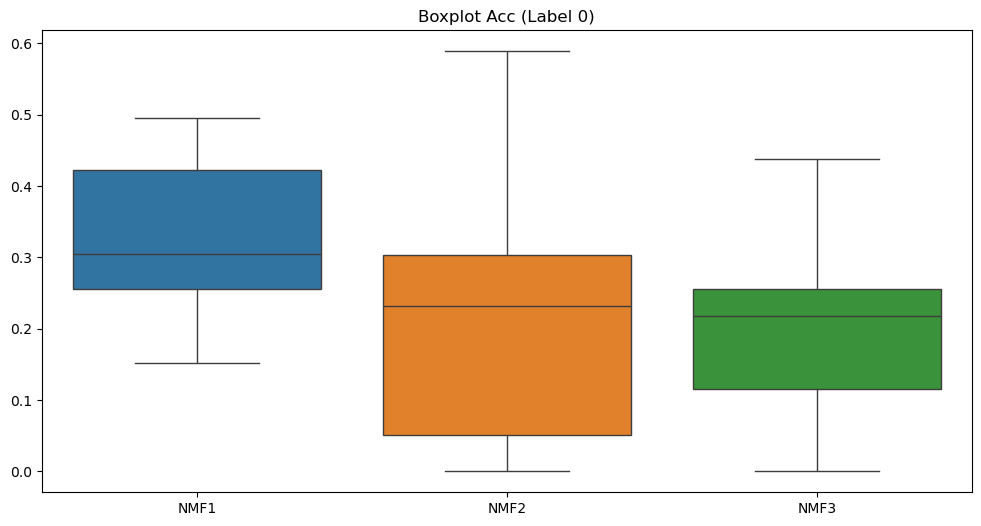

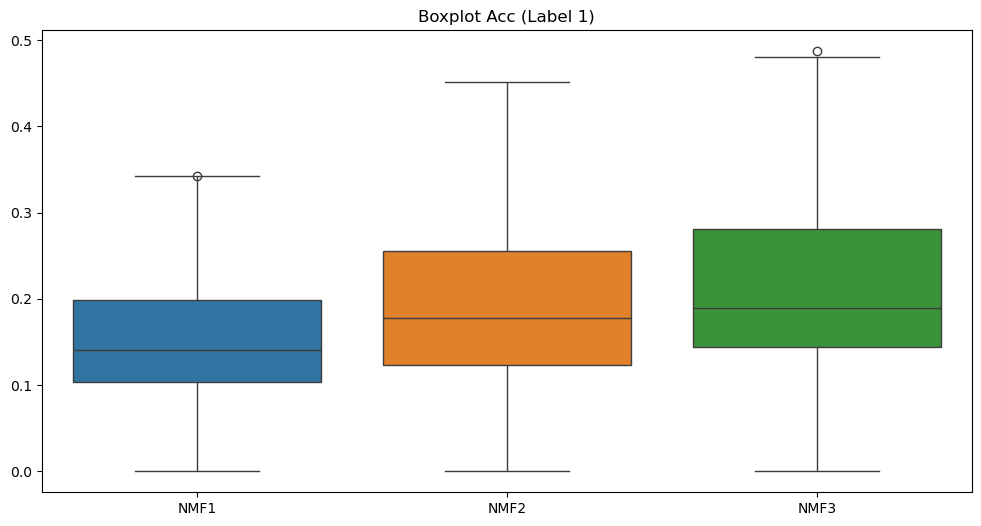

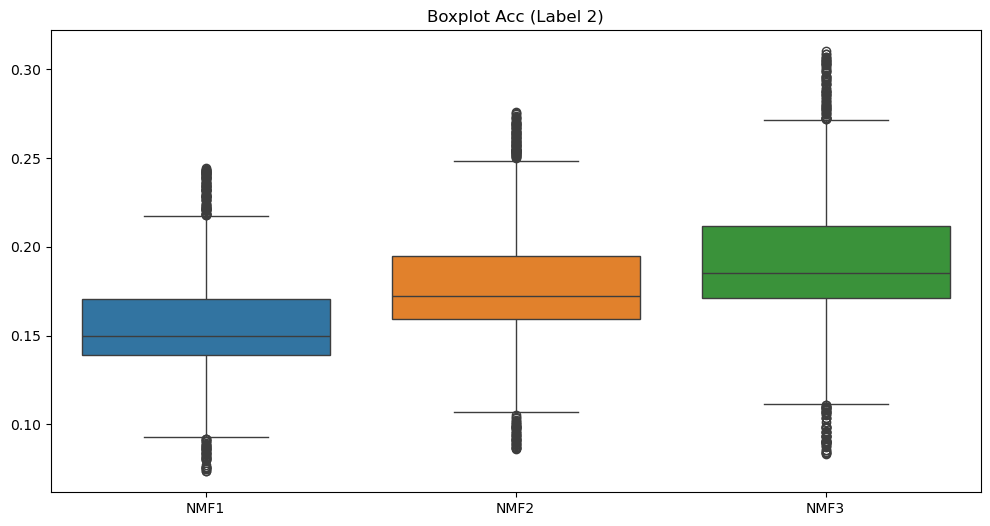

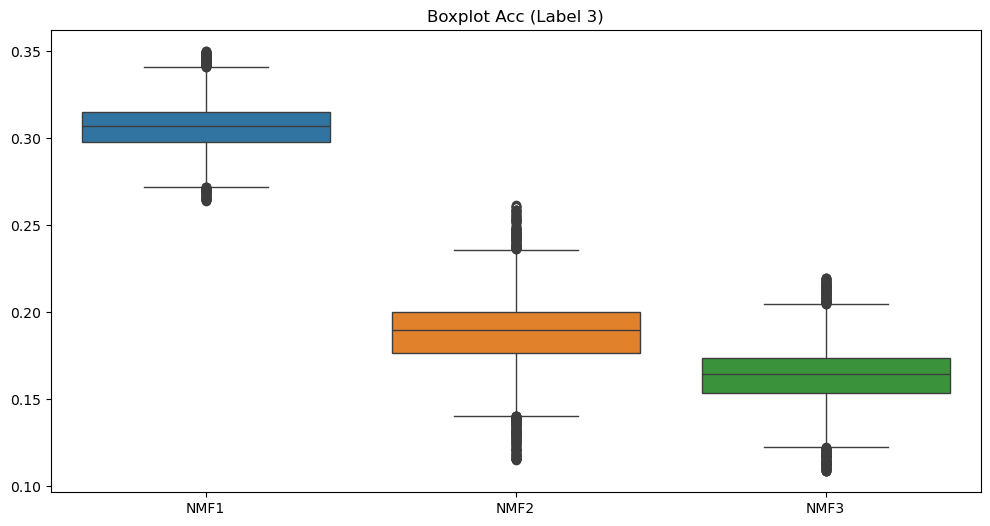

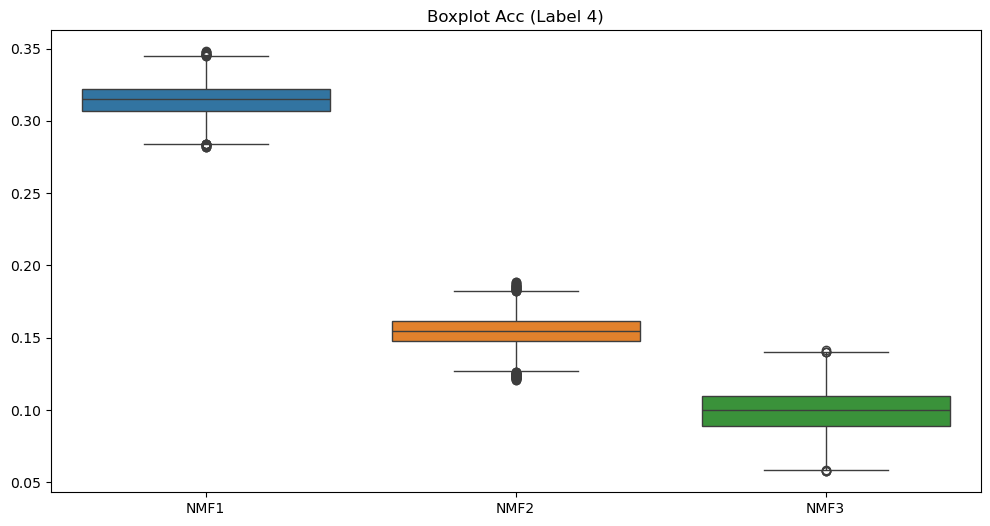

In [331]:
for label in range(5):
    plot_boxplot(df_acc_nmf, label, "Acc")

## Box Plot Gyr

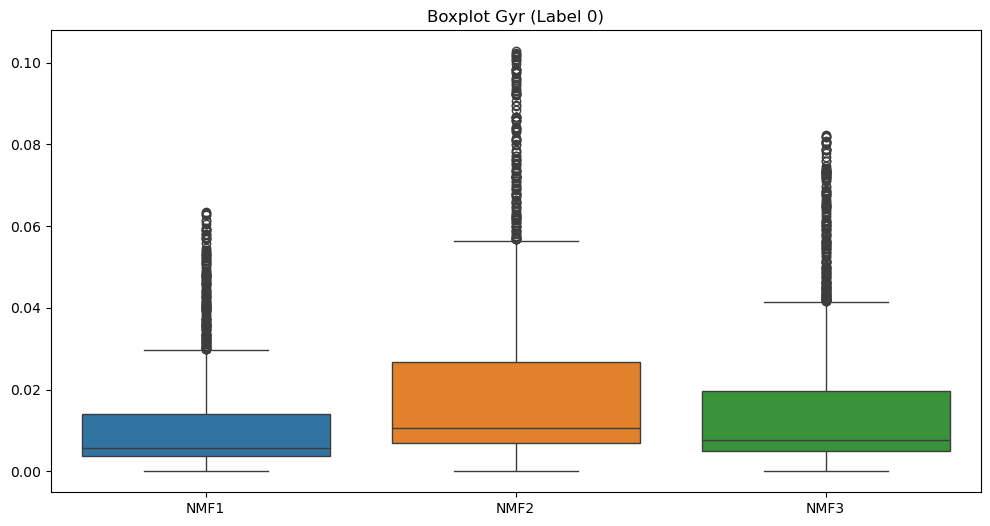

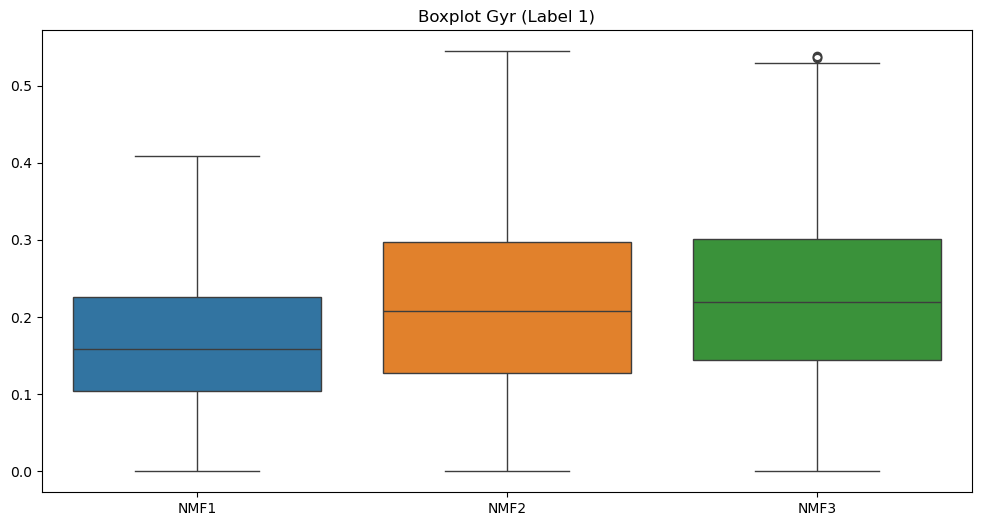

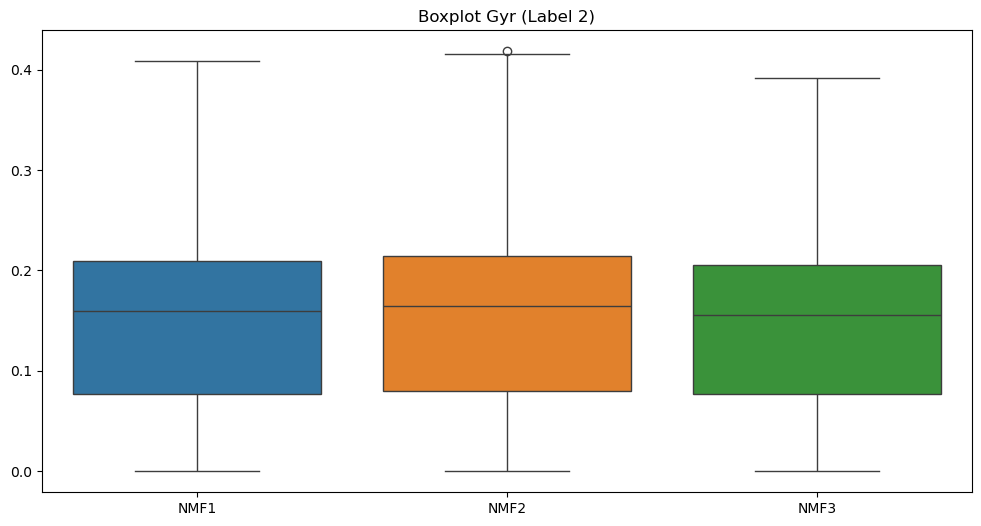

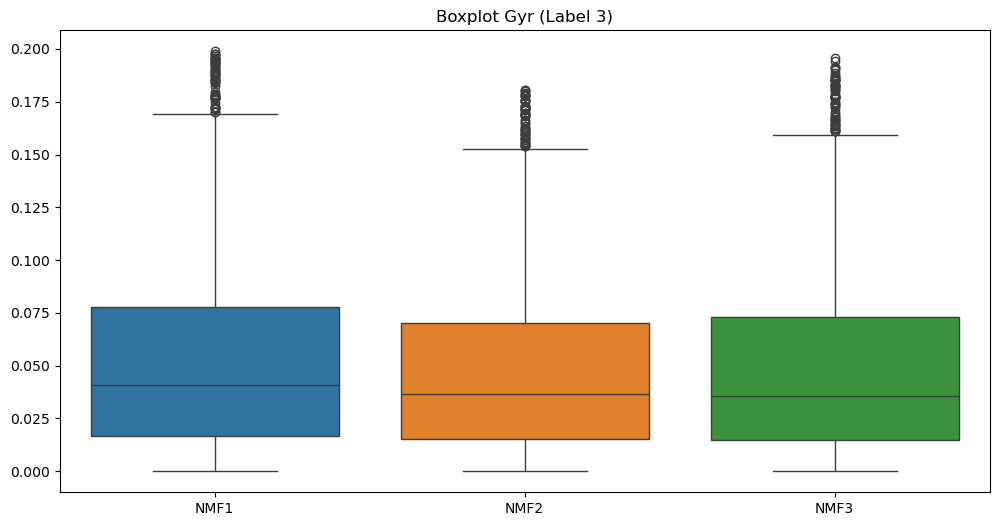

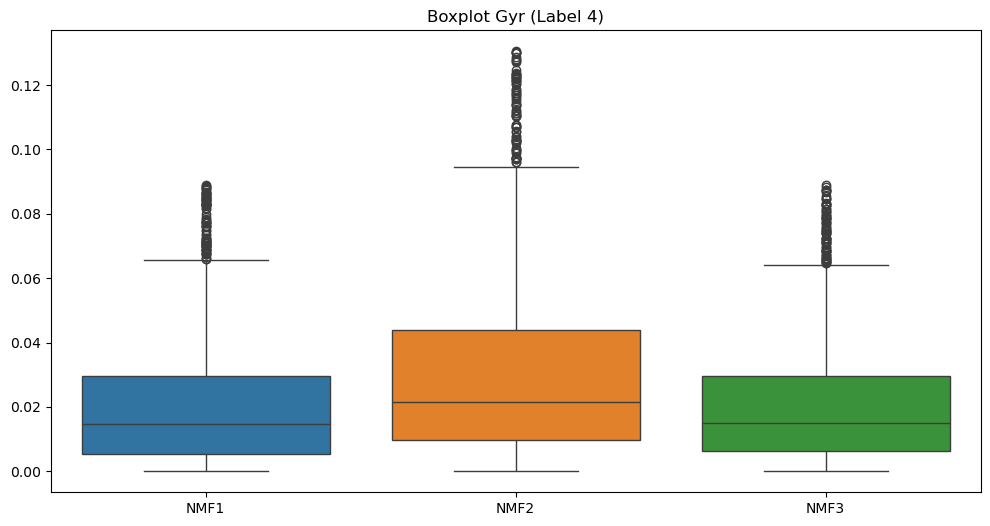

In [333]:
for label in range(5):
    plot_boxplot(df_gyr_nmf, label, "Gyr")

## Box Plot Mag 

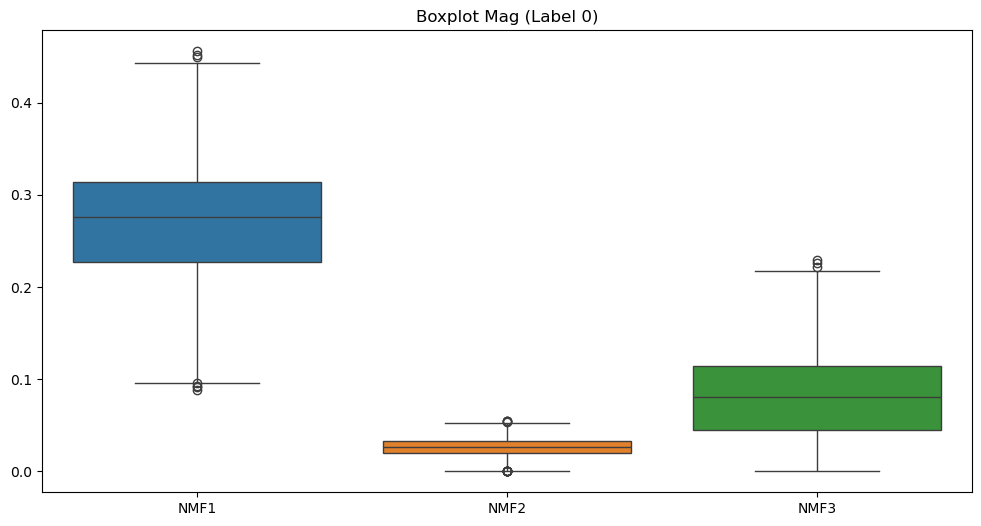

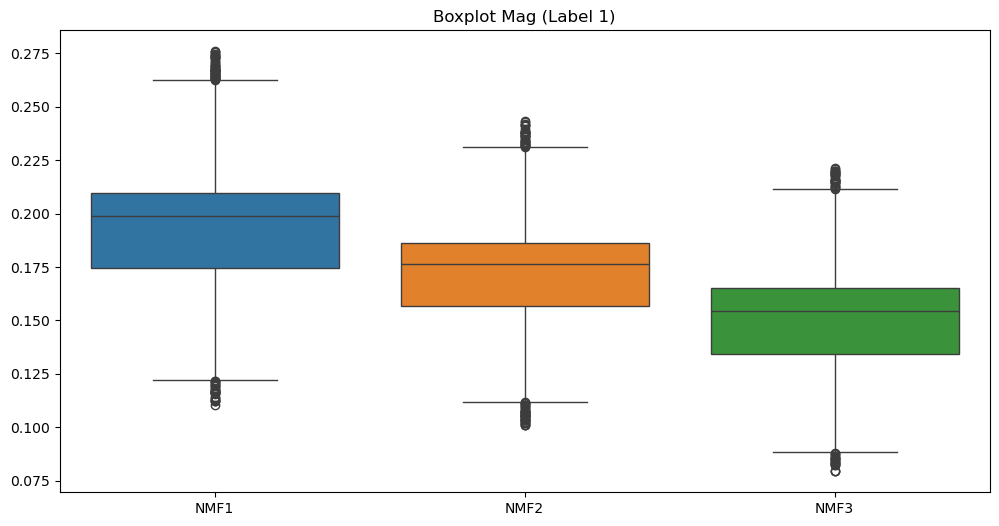

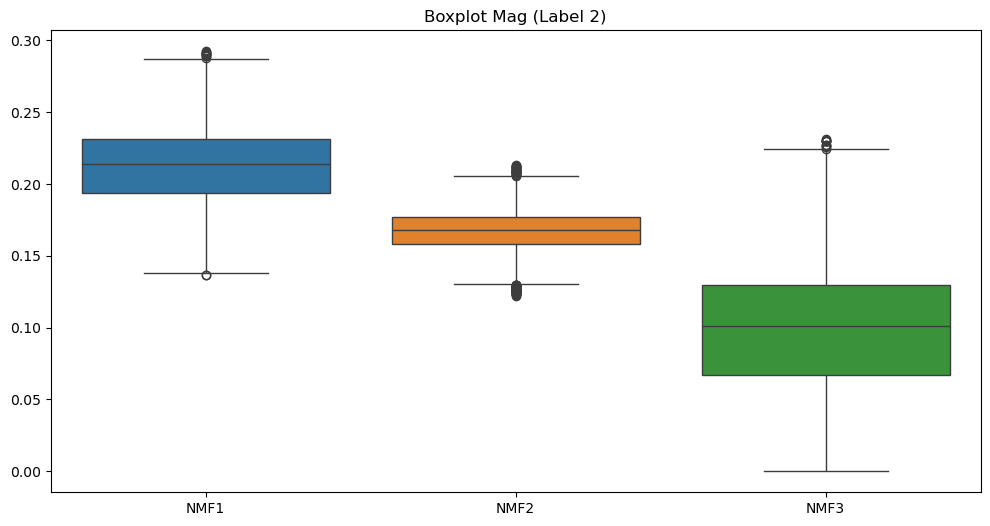

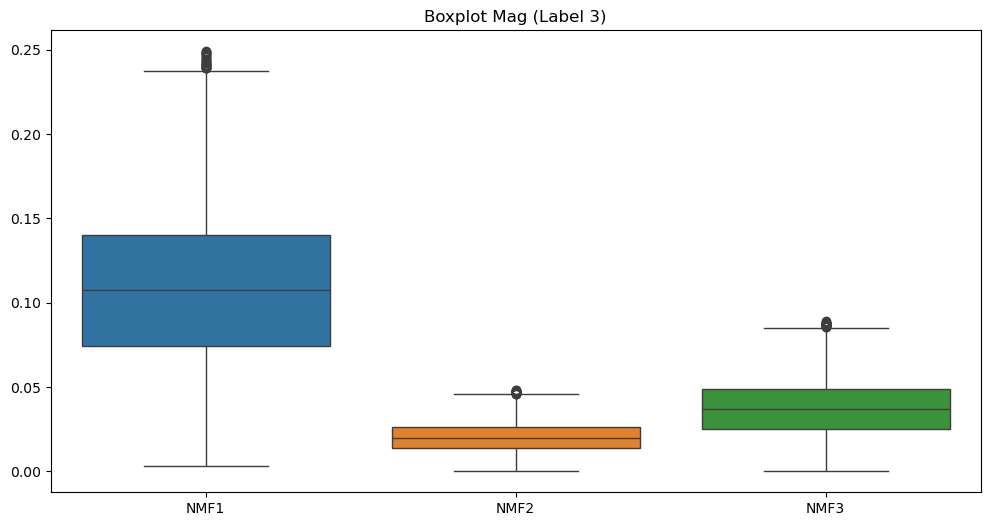

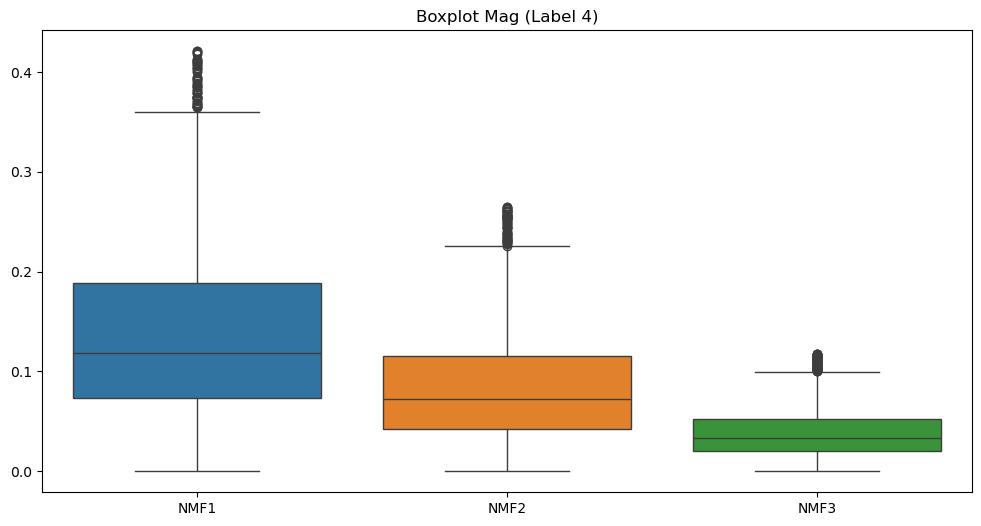

In [335]:
for label in range(5):
    plot_boxplot(df_mag_nmf, label, "Mag")